# 基础概率论与矩阵

本讲座使用矩阵代数来说明概率论的一些基本概念。

在对基本概念进行简要定义后，我们将使用矩阵和向量来描述概率分布。

我们将学习的概念包括：

- 联合概率分布
- 给定联合分布的边际分布
- 条件概率分布
- 两个随机变量的统计独立性
- 与指定边际分布相关的联合分布
    - 耦合
    - 联结函数
- 两个独立随机变量之和的概率分布
    - 边际分布的卷积

- 定义概率分布的参数
- 作为数据摘要的充分统计量

我们将使用矩阵来表示二元概率分布，使用向量来表示一元概率分布

除了Anaconda中已有的库外，本讲还需要以下库：

In [1]:
!pip install prettytable

像往常一样，我们先导入一些库

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
FONTPATH = "fonts/SourceHanSerifSC-SemiBold.otf"
mpl.font_manager.fontManager.addfont(FONTPATH)
plt.rcParams['font.family'] = ['Source Han Serif SC']

import prettytable as pt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

## 基本概念概述

我们将简要定义**概率空间**、**概率测度**和**随机变量**的含义。

在本讲座的大部分内容中，我们将这些对象放在背景中，但它们是我们将主要关注的其他对象的基础。

设 $\Omega$ 为可能的基本结果集，设 $\omega \in \Omega$ 为一个特定的基本结果。

设 $\mathcal{G} \subset \Omega$ 为 $\Omega$ 的一个子集。

设 $\mathcal{F}$ 为这些子集 $\mathcal{G} \subset \Omega$ 的集合。

对 $\Omega,\mathcal{F}$ 这个我们想要赋予概率测度的配对构成了我们的**概率空间**。

**概率测度** $\mu$ 将可能的基本结果集 $\mathcal{G} \in \mathcal{F}$ 映射到0和1之间的标量数

- 这是 $X$ 属于 $A$ 的"概率"，记为 $ \textrm{Prob}\{X\in A\}$。

**随机变量** $X(\omega)$ 是基础结果 $\omega \in \Omega$ 的一个函数。

随机变量 $X(\omega)$ 具有由基础概率测度 $\mu$ 和函数 $X(\omega)$ 诱导的**概率分布**：

$$
\textrm{Prob} (X \in A ) = \int_{\mathcal{G}} \mu(\omega) d \omega
$$ (eq:CDFfromdensity)

其中 ${\mathcal G}$ 是 $\Omega$ 的子集，满足 $X(\omega) \in A$。

我们称这为随机变量 $X$ 的诱导概率分布。

## 概率是什么意思？

在深入之前，我们先简单谈谈概率论的含义以及它与统计学的联系。

我们在 quantecon 讲座 <https://python.quantecon.org/prob_meaning.html> 和 <https://python.quantecon.org/navy_captain.html> 中也涉及了这些主题。

在本讲座的大部分内容中，我们将讨论固定的"总体"概率。

这些是纯数学对象。

要理解统计学家如何将概率与数据联系起来，关键是理解以下概念：

* 从概率分布中进行单次抽样
* 从同一概率分布中进行重复的独立同分布(i.i.d.)抽样，获得"样本"或"实现值"
* **统计量**，定义为样本序列的函数
* **经验分布**或**直方图**（分箱的经验分布），用于记录观察到的**相对频率**
* 总体概率分布是我们对长序列i.i.d.抽样中**相对频率**的预期。以下数学工具精确定义了什么是**预期相对频率**
     - **大数定律(LLN)**
     - **中心极限定理(CLT)**


**标量示例**

设$X$是一个标量随机变量，它可以取$I$个可能的值
$0, 1, 2, \ldots, I-1$，其概率为

$$

{\rm Prob}(X = i) = f_i, \quad 
$$
其中

$$
 f_i \geqslant 0, \quad \sum_i f_i = 1 .
$$

我们有时写作

$$
X  \sim \{{f_i}\}_{i=0}^{I-1}
$$

这是一种简写方式，表示随机变量$X$由概率分布$ \{{f_i}\}_{i=0}^{I-1}$描述。

考虑从$X$中抽取$N$个独立同分布的样本$x_0, x_1, \dots , x_{N-1}$。

IID或iid（"独立同分布"）中的"同分布"和"独立"是什么意思？

- "同分布"意味着每次抽样都来自相同的分布。
- "独立"意味着联合分布等于边际分布的乘积，即：

$$
\begin{aligned}
\textrm{Prob}\{x_0 = i_0, x_1 = i_1, \dots , x_{N-1} = i_{N-1}\} &= \textrm{Prob}\{x_0 = i_0\} \cdot \dots \cdot \textrm{Prob}\{x_{I-1} = i_{I-1}\}\\
&= f_{i_0} f_{i_1} \cdot \dots \cdot f_{i_{N-1}}\\
\end{aligned}
$$

我们定义一个**经验分布**如下。

对于每个 $i = 0,\dots,I-1$，令

$$
\begin{aligned}
N_i & = X = i \ \text{出现的次数},\\
N & = \sum^{I-1}_{i=0} N_i \quad \text{总抽取次数},\\
\tilde {f_i} &  = \frac{N_i}{N} \sim \ X=i \ \text{时抽取的频率}
\end{aligned}
$$

将概率论与统计学联系起来的关键思想是大数定律和中心极限定理

**大数定律：**

- 大数定律(LLN)表明 $\tilde {f_i} \to f_i \text{ 当 } N \to \infty$

**中心极限定理：**

- 中心极限定理(CLT)描述了 $\tilde {f_i} \to f_i$ 的**收敛速率**

**备注**

- 对于"频率学派"统计学家来说，**预期相对频率**就是概率分布的**全部**含义。

- 但对贝叶斯学派来说，它意味着更多或不同的东西。

## 表示概率分布

概率分布 $\textrm{Prob} (X \in A)$ 可以用其**累积分布函数(CDF)**来描述

$$
F_{X}(x) = \textrm{Prob}\{X\leq x\}.
$$

有时候（但不总是如此），随机变量也可以用与其累积分布函数相关的**密度函数** $f(x)$ 来描述：

$$
\textrm{Prob} \{X\in B\} = \int_{t\in B}f(t)dt
$$

$$
F(x) = \int_{-\infty}^{x}f(t)dt
$$

这里的 $B$ 是我们想要计算概率的可能 $X$ 值的集合。

当概率密度存在时，概率分布可以通过其累积分布函数或密度函数来表征。

对于**离散值**随机变量：

* $X$ 的可能值的数量是有限的或可数无限的
* 我们用**概率质量函数**（一个非负且和为1的序列）代替**密度**
* 在类似 {eq}`eq:CDFfromdensity` 这样的关联累积分布函数和概率质量函数的公式中，我们用求和代替积分

在本讲中，我们主要讨论离散随机变量。

这样做使我们能够基本上将我们的工具集限制在线性代数范围内。

稍后我们将简要讨论如何用离散随机变量来近似连续随机变量。


## 单变量概率分布

在本讲中，我们将主要讨论离散值随机变量，但也会简单介绍一下连续值随机变量。


### 离散随机变量

设 $X$ 是一个离散随机变量，其可能取值为：$i=0,1,\ldots,I-1 = \bar{X}$。

这里，我们选择最大索引 $I-1$ 是因为这与Python的索引约定很好地对应。

定义 $f_i \equiv \textrm{Prob}\{X=i\}$
并构造非负向量

$$
f=\left[\begin{array}{c}
f_{0}\\
f_{1}\\
\vdots\\
f_{I-1}
\end{array}\right]
$$ (eq:discretedist)

其中对每个 $i$ 都有 $f_{i} \in [0,1]$ 且 $\sum_{i=0}^{I-1}f_i=1$。

这个向量定义了一个**概率质量函数**。

分布 {eq}`eq:discretedist`
的**参数**为 $\{f_{i}\}_{i=0,1, \cdots ,I-2}$，因为 $f_{I-1} = 1-\sum_{i=0}^{I-2}f_{i}$。

这些参数确定了分布的形状。

（有时 $I = \infty$。）

这种"非参数"分布的"参数"数量与随机变量的可能值数量相同。

我们经常使用由少量参数表征的特殊分布。

在这些特殊的参数分布中，

$$
f_i = g(i; \theta)
$$

其中 $\theta$ 是一个参数向量，其维度远小于 $I$。

**注意：**

- **参数**的概念与**充分统计量**的概念密切相关。
- 充分统计量是数据集的非线性函数。
- 充分统计量旨在总结数据集中包含的关于参数的所有**信息**。
- 它们是人工智能用来总结**大数据**集的重要工具。
- R. A. Fisher 提供了**信息**的严格定义 -- 参见 <https://en.wikipedia.org/wiki/Fisher_information>

**几何分布**是参数概率分布的一个例子。

它的描述如下：

$$
f_{i} = \textrm{Prob}\{X=i\} = (1-\lambda)\lambda^{i},\quad \lambda \in [0,1], \quad i = 0, 1, 2, \ldots
$$

显然，$\sum_{i=0}^{\infty}f_i=1$。

设$\theta$是由$f$描述的分布的参数向量，则：

$$
f_i( \theta)\ge0, \sum_{i=0}^{\infty}f_i(\theta)=1
$$

### 连续随机变量

设$X$是一个取值为$X \in \tilde{X}\equiv[X_U,X_L]$的连续随机变量，其分布具有参数$\theta$。

$$
\textrm{Prob}\{X\in A\} = \int_{x\in A} f(x;\theta)\,dx;  \quad f(x;\theta)\ge0
$$

其中$A$是$\tilde{X}$的一个子集，且：

$$
\textrm{Prob}\{X\in \tilde{X}\} =1
$$

## 二元概率分布

现在我们将讨论二元**联合分布**。

首先，我们将讨论限制在两个离散随机变量的情况。

设$X,Y$是两个离散随机变量，它们的取值为：

$$
X\in\{0,\ldots,I-1\}
$$

$$

Y\in\{0,\ldots,J-1\}
$$

它们的**联合分布**由矩阵表示

$$
F_{I\times J}=[f_{ij}]_{i\in\{0,\ldots,I-1\}, j\in\{0,\ldots,J-1\}}
$$

其中矩阵元素为

$$
f_{ij}=\textrm{Prob}\{X=i,Y=j\} \geq 0
$$

且满足

$$
\sum_{i}\sum_{j}f_{ij}=1
$$

## 边缘概率分布

联合分布可以导出边缘分布

$$
\textrm{Prob}\{X=i\}= \sum_{j=0}^{J-1}f_{ij} = \mu_i, \quad i=0,\ldots,I-1
$$

$$
\textrm{Prob}\{Y=j\}= \sum_{i=0}^{I-1}f_{ij} = \nu_j, \quad j=0,\ldots,J-1
$$

例如，设$(X,Y)$的联合分布为

$$
F = \left[
   \begin{matrix}
   .25 & .1\\
   .15 & .5
  \end{matrix}
\right]
$$ (eq:example101discrete)

由此得到的边缘分布为:

$$
\begin{aligned}
\textrm{Prob} \{X=0\}&=.25+.1=.35\\
\textrm{Prob}\{X=1\}& =.15+.5=.65\\
\textrm{Prob}\{Y=0\}&=.25+.15=.4\\
\textrm{Prob}\{Y=1\}&=.1+.5=.6
\end{aligned}
$$

**题外话：** 如果两个随机变量 $X,Y$ 是连续的且具有联合密度 $f(x,y)$，则边缘分布可以通过以下方式计算：

$$
\begin{aligned}
f(x)& = \int_{\mathbb{R}} f(x,y) dy\\
f(y)& = \int_{\mathbb{R}} f(x,y) dx
\end{aligned}
$$

## 条件概率分布

条件概率的定义为：

$$
\textrm{Prob}\{A \mid B\}=\frac{\textrm{Prob}\{A \cap B\}}{\textrm{Prob}\{B\}}
$$

其中 $A, B$ 是两个事件。

对于一对离散随机变量，我们有**条件分布**：

$$
\textrm{Prob}\{X=i|Y=j\}=\frac{f_{ij}}{\sum_{i}f_{ij}}
=\frac{\textrm{Prob} \{X=i, Y=j\} }{\textrm{Prob} \{Y=j\} }
$$

其中 $i=0, \ldots,I-1, \quad j=0,\ldots,J-1$。

注意：

$$
\sum_{i}\textrm{Prob}\{X_i=i|Y_j=j\}
=\frac{ \sum_{i}f_{ij} }{ \sum_{i}f_{ij}}=1
$$

**注：** 条件概率的数学原理暗含着**贝叶斯定律**：

$$

\textrm{Prob}\{X=i|Y=j\}	=\frac{\textrm{Prob}\{X=i,Y=j\}}{\textrm{Prob}\{Y=j\}}=\frac{\textrm{Prob}\{Y=j|X=i\}\textrm{Prob}\{X=i\}}{\textrm{Prob}\{Y=j\}}
$$

对于联合分布 {eq}`eq:example101discrete`

$$
\textrm{Prob}\{X=0|Y=1\} =\frac{ .1}{.1+.5}=\frac{.1}{.6}
$$

## 统计独立性

如果随机变量 X 和 Y 满足以下条件，则称它们是统计**独立**的：

$$
\textrm{Prob}\{X=i,Y=j\}={f_ig_j}
$$

其中

$$
\begin{aligned}
\textrm{Prob}\{X=i\} &=f_i\ge0， \sum{f_i}=1 \cr
\textrm{Prob}\{Y=j\} & =g_j\ge0， \sum{g_j}=1
\end{aligned}
$$

条件分布为：

$$
\begin{aligned}
\textrm{Prob}\{X=i|Y=j\} & =\frac{f_ig_j}{\sum_{i}f_ig_j}=\frac{f_ig_j}{g_j}=f_i \\
\textrm{Prob}\{Y=j|X=i\} & =\frac{f_ig_j}{\sum_{j}f_ig_j}=\frac{f_ig_j}{f_i}=g_j
\end{aligned}
$$

## 均值和方差

离散随机变量 $X$ 的均值和方差为：

$$
\begin{aligned}
\mu_{X} & \equiv\mathbb{E}\left[X\right]
=\sum_{k}k \textrm{Prob}\{X=k\} \\

\sigma_{X}^{2} & \equiv\mathbb{D}\left[X\right]=\sum_{k}\left(k-\mathbb{E}\left[X\right]\right)^{2}\textrm{Prob}\{X=k\}
\end{aligned}
$$

具有密度$f_{X}(x)$的连续随机变量的均值和方差为

$$
\begin{aligned}
\mu_{X} & \equiv\mathbb{E}\left[X\right]=\int_{-\infty}^{\infty}xf_{X}(x)dx \\
\sigma_{X}^{2}\equiv\mathbb{D}\left[X\right] & =\mathrm{E}\left[\left(X-\mu_{X}\right)^{2}\right]=\int_{-\infty}^{\infty}\left(x-\mu_{X}\right)^{2}f_{X}(x)dx
\end{aligned}
$$

## 生成随机数

假设我们有一个可以生成均匀随机变量的伪随机数生成器，即具有如下概率分布的随机变量：

$$
\textrm{Prob}\{\tilde{X}=i\}=\frac{1}{I},\quad i=0,\ldots,I-1
$$

如何将$\tilde{X}$转换为随机变量$X$，使得$\textrm{Prob}\{X=i\}=f_i,\quad i=0,\ldots,I-1$，其中$f_i$是在$i=0,1,\dots,I-1$上的任意离散概率分布？

关键工具是累积分布函数(CDF)的逆函数。

注意，分布的CDF是单调且非递减的，取值在$0$和$1$之间。

我们可以通过以下方式从已知CDF的随机变量$X$中抽取样本：

- 从区间$[0,1]$上的均匀分布中抽取随机变量$u$
- 将$u$的样本值代入目标CDF的**"逆函数"**得到$X$
- $X$具有目标CDF

因此，知道分布的**"逆"**CDF就足以从这个分布中进行模拟。

```{note}
这个方法要求"逆"CDF必须存在。
```

逆CDF定义为

$$
F^{-1}(u)\equiv\inf \{x\in \mathbb{R}: F(x) \geq u\} \quad(0<u<1)
$$

这里我们使用下确界是因为CDF是非递减且右连续的函数。

因此，假设：

- $U$是一个均匀随机变量$U\in[0,1]$
- 我们想要对CDF为$F$的随机变量$X$进行抽样

事实证明，如果我们使用均匀随机数 $U$ 然后通过以下方式计算 $X$：

$$
X=F^{-1}(U),
$$

那么 $X$ 就是一个具有累积分布函数 $F_X(x)=F(x)=\textrm{Prob}\{X\le x\}$ 的随机变量。

我们将在 $F$ 是连续且双射的特殊情况下验证这一点，因此其反函数存在且可以表示为 $F^{-1}$。

注意到

$$
\begin{aligned}
F_{X}\left(x\right)	& =\textrm{Prob}\left\{ X\leq x\right\} \\
	& =\textrm{Prob}\left\{ F^{-1}\left(U\right)\leq x\right\} \\
	& =\textrm{Prob}\left\{ U\leq F\left(x\right)\right\} \\
	& =F\left(x\right)
\end{aligned}
$$

最后一个等式成立是因为 $U$ 在 $[0,1]$ 上均匀分布，而给定 $x$ 时，$F(x)$ 是一个也位于 $[0,1]$ 上的常数。

让我们使用 `numpy` 来计算一些例子。

**示例：连续几何（指数）分布**

设 $X$ 服从几何分布，参数为 $\lambda>0$。

其密度函数为

$$
\quad f(x)=\lambda e^{-\lambda x}
$$

其累积分布函数为

F(x)=\int_{0}^{\infty}\lambda e^{-\lambda x}=1-e^{-\lambda x}
$$

设 $U$ 在 $[0,1]$ 上服从均匀分布。

$X$ 是一个随机变量，满足 $U=F(X)$。

$X$ 的分布可以通过以下推导得出：

$$
\begin{aligned}
U& =F(X)=1-e^{-\lambda X}\qquad\\
\implies & \quad -U=e^{-\lambda X}\\
\implies&  \quad \log(1-U)=-\lambda X\\
\implies & \quad X=\frac{(1-U)}{-\lambda}
\end{aligned}
$$

让我们从 $U[0,1]$ 中抽取 $u$ 并计算 $x=\frac{log(1-U)}{-\lambda}$。

我们将检验 $X$ 是否似乎服从**连续几何**（指数）分布。

让我们用 `numpy` 来验证。

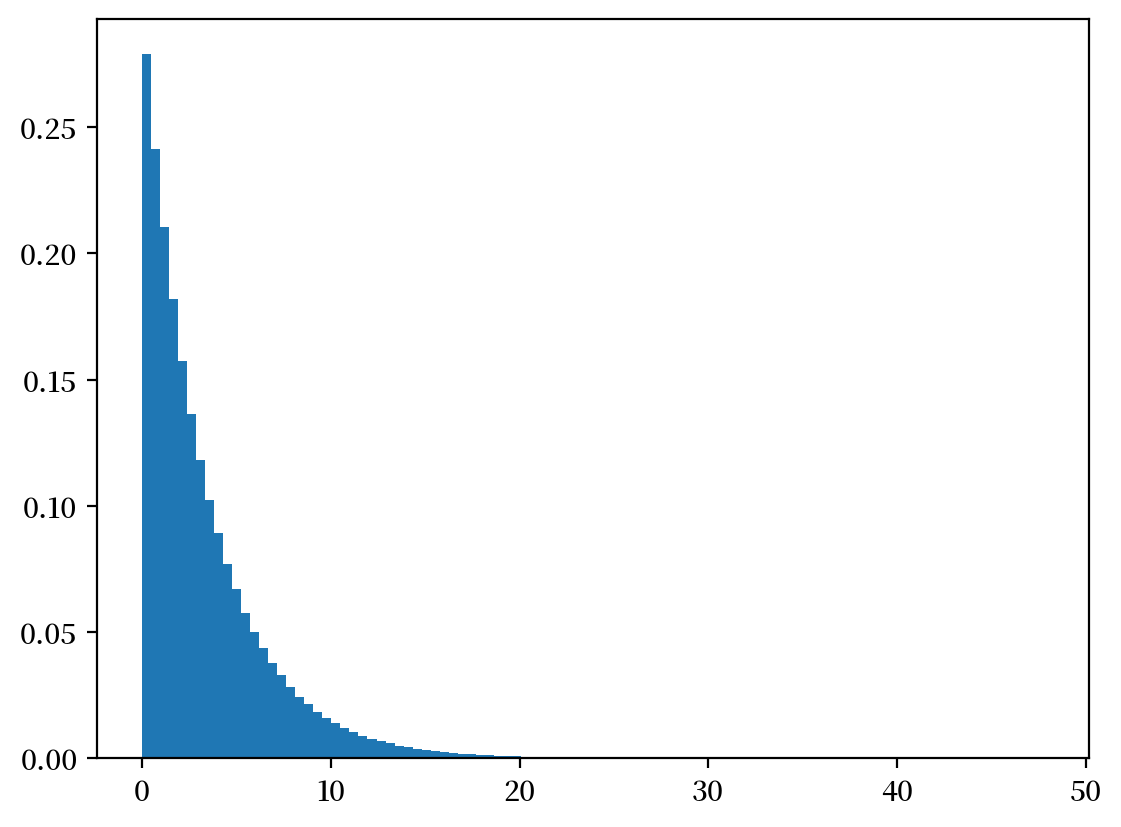

In [3]:
n, λ = 1_000_000, 0.3

# 生成均匀分布随机数
u = np.random.rand(n)

# 转换
x = -np.log(1-u)/λ

# 生成几何分布
x_g = np.random.exponential(1 / λ, n)

# 绘图并比较
plt.hist(x, bins=100, density=True)
plt.show()

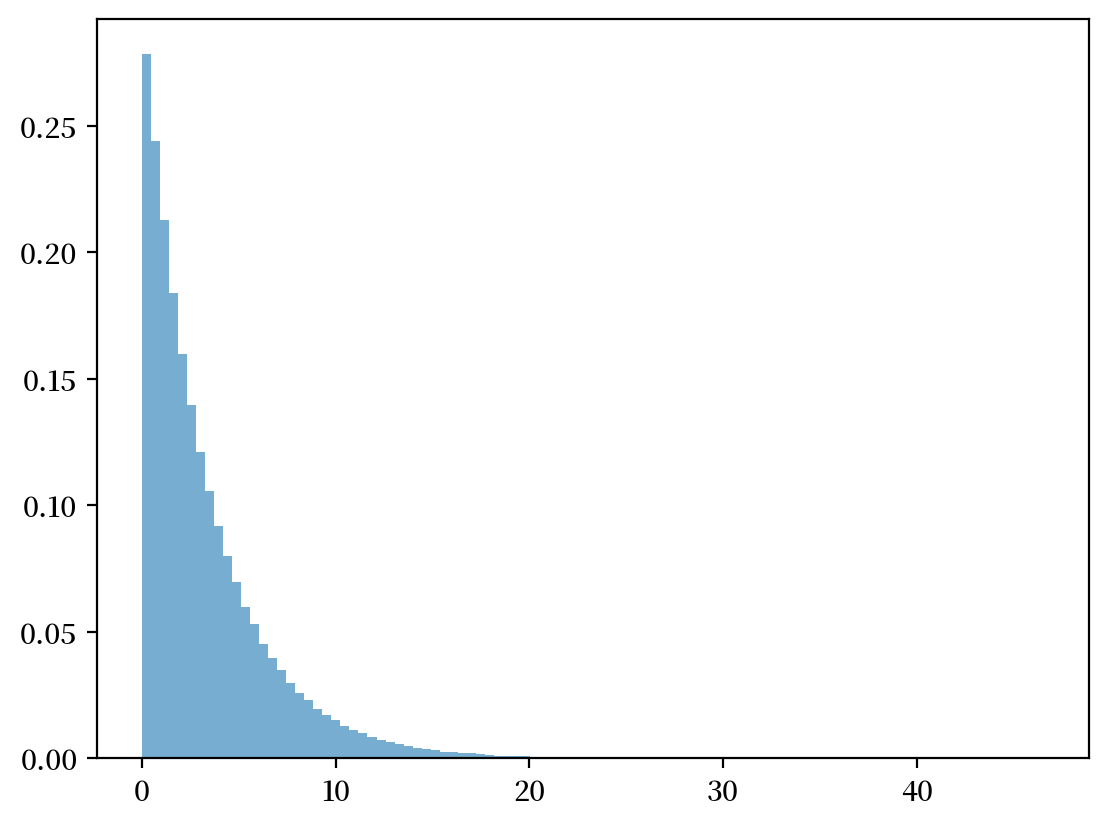

In [4]:
plt.hist(x_g, bins=100, density=True, alpha=0.6)
plt.show()

**几何分布**

设 $X$ 服从几何分布，即

$$
\begin{aligned}
\textrm{Prob}(X=i) & =(1-\lambda)\lambda^i,\quad\lambda\in(0,1), \quad  i=0,1,\dots \\
 & \sum_{i=0}^{\infty}\textrm{Prob}(X=i)=1\longleftrightarrow(1- \lambda)\sum_{i=0}^{\infty}\lambda^i=\frac{1-\lambda}{1-\lambda}=1
\end{aligned}
$$

其累积分布函数(CDF)为

$$
\begin{aligned}
\textrm{Prob}(X\le i)& =(1-\lambda)\sum_{j=0}^{i}\lambda^i\\
& =(1-\lambda)[\frac{1-\lambda^{i+1}}{1-\lambda}]\\
& =1-\lambda^{i+1}\\
& =F(X)=F_i \quad
\end{aligned}
$$

再次，设 $\tilde{U}$ 服从均匀分布，我们要找到满足 $F(X)=\tilde{U}$ 的 $X$。

让我们从以下推导 $X$ 的分布：

$$
\begin{aligned}
\tilde{U} & =F(X)=1-\lambda^{x+1}\\
1-\tilde{U} & =\lambda^{x+1}\\
\log(1-\tilde{U})& =(x+1)\log\lambda\\
\frac{\log(1-\tilde{U})}{\log\lambda}& =x+1\\
\frac{\log(1-\tilde{U})}{\log\lambda}-1 &=x
\end{aligned}
$$

然而，对于任何 $x\geq0$，$\tilde{U}=F^{-1}(X)$ 可能不是整数。

所以令

$$
x=\lceil\frac{\log(1-\tilde{U})}{\log\lambda}-1\rceil
$$

其中 $\lceil . \rceil$ 是向上取整函数。

因此，$x$ 是使离散几何累积分布函数大于或等于 $\tilde{U}$ 的最小整数。

我们可以通过以下 `numpy` 程序验证 $x$ 确实服从几何分布。

```{note}
指数分布是几何分布的连续类比。
```

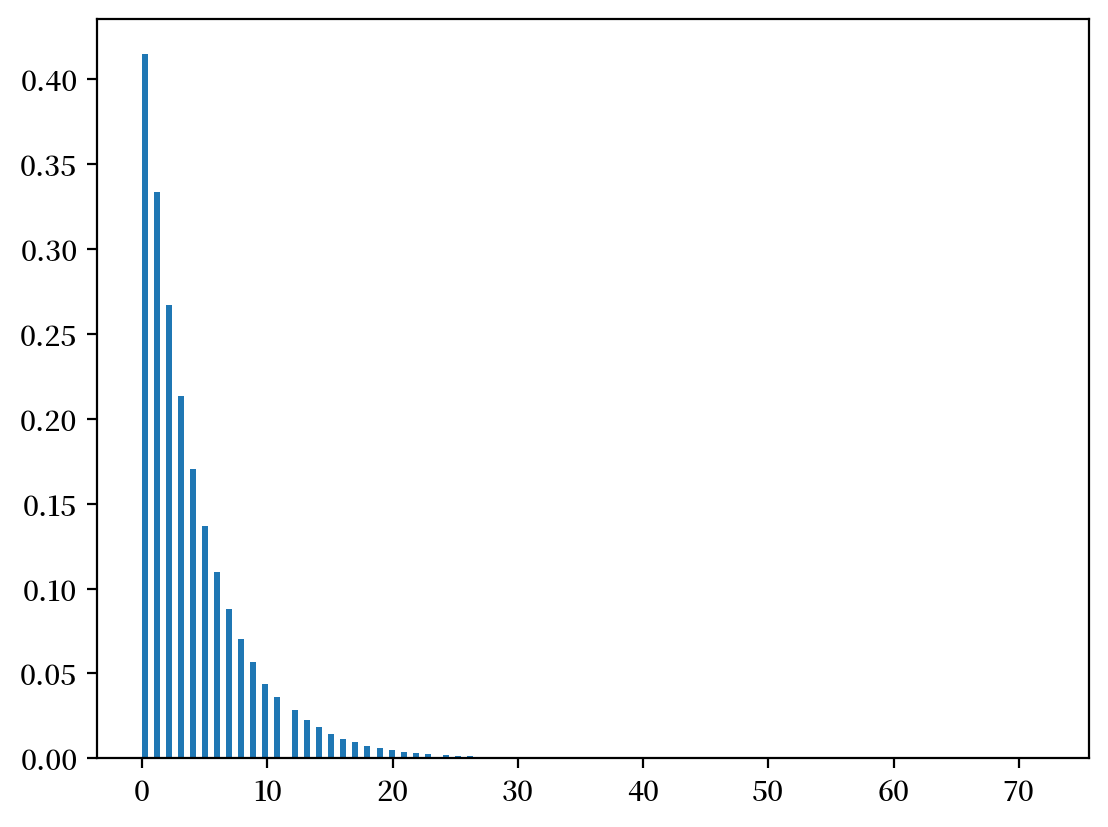

In [5]:
n, λ = 1_000_000, 0.8

# 生成均匀分布随机数
u = np.random.rand(n)

# 变换
x = np.ceil(np.log(1-u)/np.log(λ) - 1)

# 生成几何分布
x_g = np.random.geometric(1-λ, n)

# 绘图并比较
plt.hist(x, bins=150, density=True)
plt.show()

In [6]:
np.random.geometric(1-λ, n).max()

60

In [7]:
np.log(0.4)/np.log(0.3)

0.7610560044063083

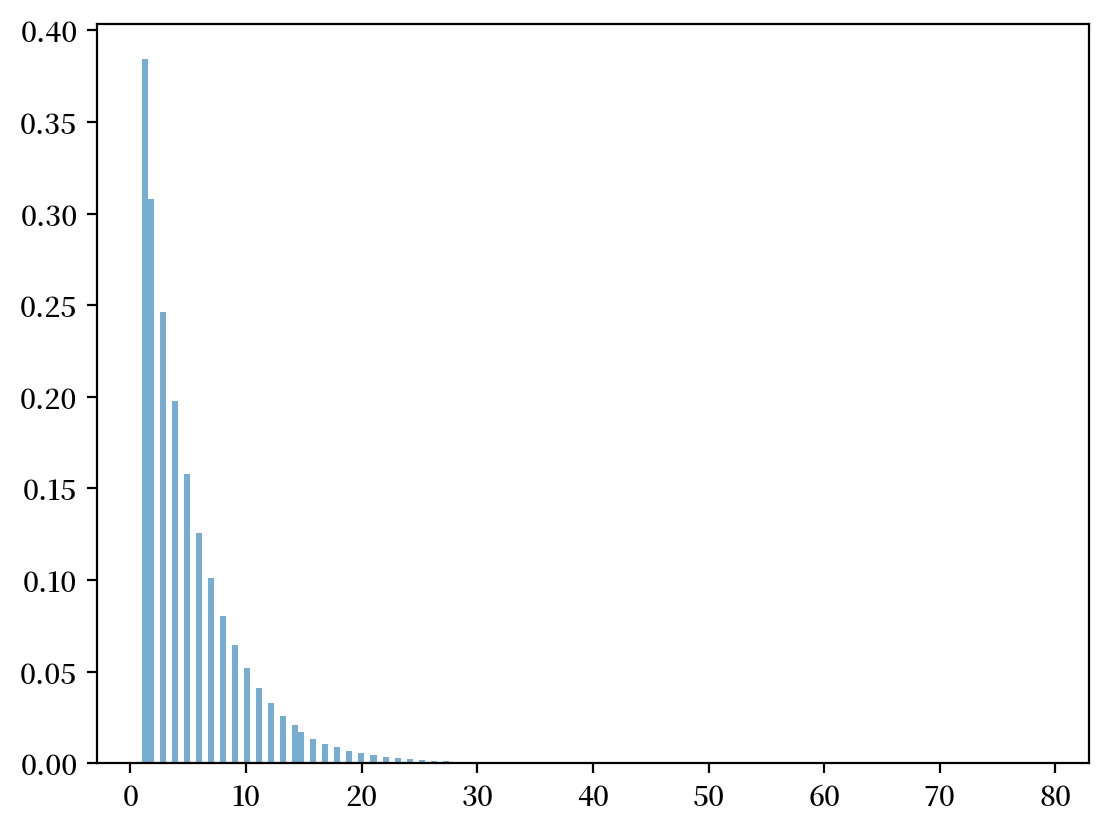

In [8]:
plt.hist(x_g, bins=150, density=True, alpha=0.6)
plt.show()

## 一些离散概率分布

让我们编写一些Python代码来计算单变量随机变量的均值和方差。

我们将使用代码来

- 从概率分布计算总体均值和方差
- 生成N个独立同分布的样本并计算样本均值和方差
- 比较总体和样本的均值和方差

## 几何分布

$$
\textrm{Prob}(X=k)=(1-p)^{k-1}p,k=1,2, \ldots
$$

$\implies$

$$
\begin{aligned}
\mathbb{E}(X) & =\frac{1}{p}\\\mathbb{D}(X) & =\frac{1-p}{p^2}
\end{aligned}
$$

我们从该分布中抽取观测值，并将样本均值和方差与理论结果进行比较。

In [9]:
# 指定参数
p, n = 0.3, 1_000_000

# 从分布中抽取观测值
x = np.random.geometric(p, n)

# 计算样本均值和方差
μ_hat = np.mean(x)
σ2_hat = np.var(x)

print("样本均值为：", μ_hat, "\n样本方差为：", σ2_hat)

# 与理论结果比较
print("\n总体均值为：", 1/p)
print("总体方差为：", (1-p)/(p**2))

样本均值为： 3.33112 
样本方差为： 7.773919545600003

总体均值为： 3.3333333333333335
总体方差为： 7.777777777777778


### 纽科姆-本福特分布

**纽科姆-本福特定律**适用于许多数据集，例如向税务机关报告的收入，其中首位数字更可能是小数而不是大数。

参见 <https://en.wikipedia.org/wiki/Benford%27s_law>

本福特概率分布为

$$
\textrm{Prob}\{X=d\}=\log _{10}(d+1)-\log _{10}(d)=\log _{10}\left(1+\frac{1}{d}\right)
$$

其中 $d\in\{1,2,\cdots,9\}$ 可以被视为数字序列中的**首位数字**。

这是一个明确定义的离散分布，因为我们可以验证概率是非负的且和为 $1$。

$$
\log_{10}\left(1+\frac{1}{d}\right)\geq0,\quad\sum_{d=1}^{9}\log_{10}\left(1+\frac{1}{d}\right)=1
$$

本福特分布的均值和方差为

$$
\begin{aligned}
\mathbb{E}\left[X\right]	 &=\sum_{d=1}^{9}d\log_{10}\left(1+\frac{1}{d}\right)\simeq3.4402 \\
\mathbb{V}\left[X\right]	 & =\sum_{d=1}^{9}\left(d-\mathbb{E}\left[X\right]\right)^{2}\log_{10}\left(1+\frac{1}{d}\right)\simeq6.0565

\end{aligned}
$$

我们使用`numpy`来验证上述结果并计算均值和方差。

In [10]:
Benford_pmf = np.array([np.log10(1+1/d) for d in range(1,10)])
k = np.array(range(1,10))

# 均值
mean = np.sum(Benford_pmf * k)

# 方差
var = np.sum([(k-mean)**2 * Benford_pmf])

# 验证概率和为1
print(np.sum(Benford_pmf))
print(mean)
print(var)

0.9999999999999999
3.440236967123206
6.056512631375667


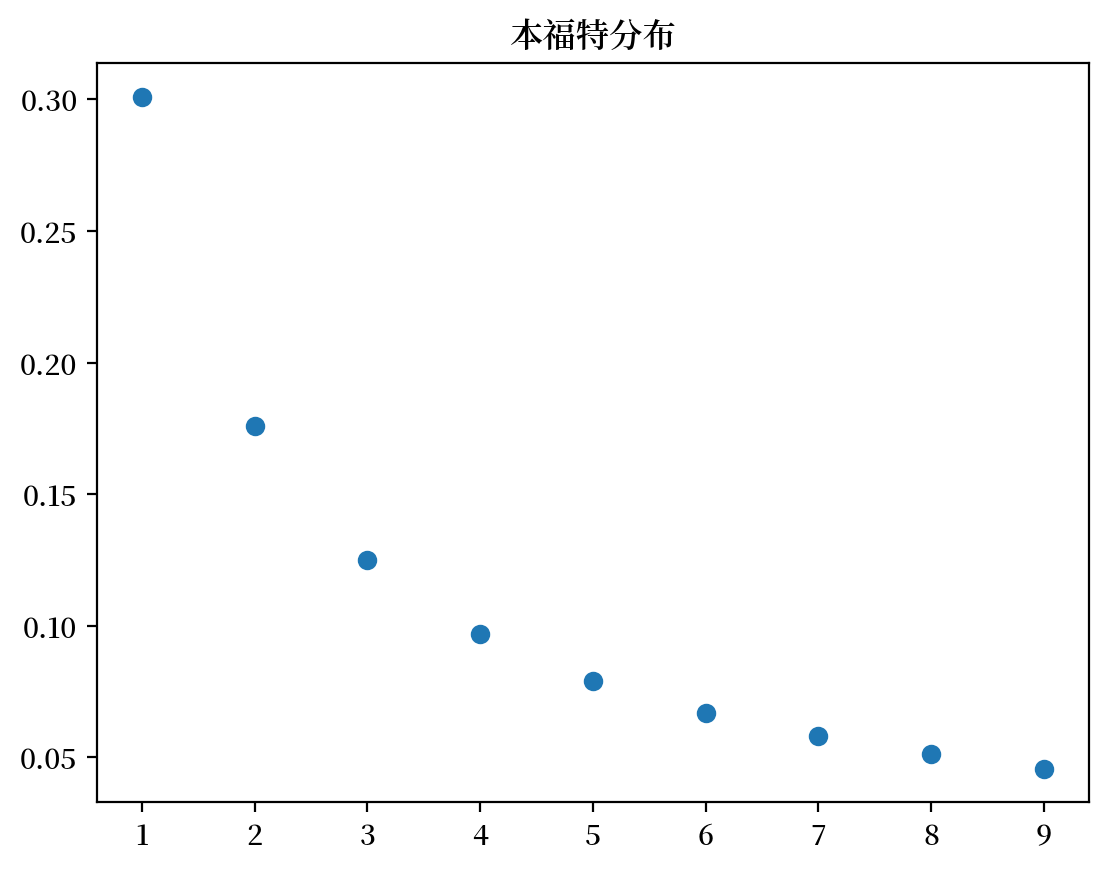

In [11]:
# 绘制分布图
plt.plot(range(1,10), Benford_pmf, 'o')
plt.title('本福特分布')
plt.show()

### 帕斯卡（负二项）分布

考虑一个独立伯努利试验序列。

设 $p$ 为成功的概率。

设 $X$ 为在获得 $r$ 次成功之前失败的次数的随机变量。

其分布为

$$
\begin{aligned}
X  & \sim NB(r,p) \\
\textrm{Prob}(X=k;r,p) & = \begin{pmatrix}k+r-1 \\ r-1 \end{pmatrix}p^r(1-p)^{k}
\end{aligned}
$$

这里，我们从 $k+r-1$ 个可能的结果中选择，因为最后一次抽取根据定义必须是成功的。

我们计算得到均值和方差为

$$
\begin{aligned}
\mathbb{E}(X) & = \frac{k(1-p)}{p} \\
\mathbb{V}(X) & = \frac{k(1-p)}{p^2}
\end{aligned}
$$

In [12]:
# 指定参数
r, p, n = 10, 0.3, 1_000_000

# 从分布中抽取观测值
x = np.random.negative_binomial(r, p, n)

# 计算样本均值和方差
μ_hat = np.mean(x)
σ2_hat = np.var(x)

print("样本均值为：", μ_hat, "\n样本方差为：", σ2_hat)
print("\n总体均值为：", r*(1-p)/p)
print("总体方差为：", r*(1-p)/p**2)

样本均值为： 23.323711 
样本方差为： 77.65827218847902

总体均值为： 23.333333333333336
总体方差为： 77.77777777777779


## 连续型随机变量

### 单变量高斯分布

我们写作

$$
X \sim N(\mu,\sigma^2)
$$

来表示概率分布

$$f(x|u,\sigma^2)=\frac{1}{\sqrt{2\pi \sigma^2}}e^{[-\frac{1}{2\sigma^2}(x-u)^2]} $$

在下面的例子中，我们设定 $\mu = 0, \sigma = 0.1$。

In [13]:
# 指定参数
μ, σ = 0, 0.1

# 指定抽样次数
n = 1_000_000

# 从分布中抽取观测值
x = np.random.normal(μ, σ, n)

# 计算样本均值和方差
μ_hat = np.mean(x)
σ_hat = np.std(x)

print("样本均值为：", μ_hat)
print("样本标准差为：", σ_hat)

样本均值为： 0.00010476492472659719
样本标准差为： 0.09997577926294748


In [14]:
# 比较
print(μ-μ_hat < 1e-3)
print(σ-σ_hat < 1e-3)

True
True


### 均匀分布

$$
\begin{aligned}
X & \sim U[a,b] \\
f(x)& = \begin{cases} \frac{1}{b-a}, & a \leq x \leq b \\ \quad0, & \text{其他}  \end{cases}
\end{aligned}
$$

总体均值和方差为

$$
\begin{aligned}
\mathbb{E}(X) & = \frac{a+b}{2} \\
\mathbb{V}(X) & = \frac{(b-a)^2}{12}
\end{aligned}
$$

In [15]:
# 指定参数
a, b = 10, 20

# 指定抽样次数
n = 1_000_000

# 从分布中抽取观测值
x = a + (b-a)*np.random.rand(n)

# 计算样本均值和方差
μ_hat = np.mean(x)
σ2_hat = np.var(x)

print("样本均值为：", μ_hat, "\n样本方差为：", σ2_hat)
print("\n总体均值为：", (a+b)/2)
print("总体方差为：", (b-a)**2/12)

样本均值为： 14.998920449351271 
样本方差为： 8.33410583038273

总体均值为： 15.0
总体方差为： 8.333333333333334


##  混合离散-连续分布

让我们用一个小故事来说明这个例子。

假设你去参加一个工作面试,你要么通过要么失败。

你有5%的机会通过面试,而且你知道如果通过的话,你的日薪会在300~400之间均匀分布。

我们可以用以下概率来描述你的日薪这个离散-连续变量:

$$
P(X=0)=0.95
$$

$$
P(300\le X \le 400)=\int_{300}^{400} f(x)\, dx=0.05
$$

$$
f(x) = 0.0005
$$

让我们先生成一个随机样本并计算样本矩。

In [16]:
x = np.random.rand(1_000_000)
# x[x > 0.95] = 100*x[x > 0.95]+300
x[x > 0.95] = 100*np.random.rand(len(x[x > 0.95]))+300
x[x <= 0.95] = 0

μ_hat = np.mean(x)
σ2_hat = np.var(x)

print("样本均值是: ", μ_hat, "\n样本方差是: ", σ2_hat)

样本均值是:  17.45413452573552 
样本方差是:  5848.67749792761


可以计算解析均值和方差：

$$
\begin{aligned}
\mu &= \int_{300}^{400}xf(x)dx \\
&= 0.0005\int_{300}^{400}xdx \\
&= 0.0005 \times \frac{1}{2}x^2\bigg|_{300}^{400}
\end{aligned}
$$

$$
\begin{aligned}
\sigma^2 &= 0.95\times(0-17.5)^2+\int_{300}^{400}(x-17.5)^2f(x)dx \\
&= 0.95\times17.5^2+0.0005\int_{300}^{400}(x-17.5)^2dx \\
&= 0.95\times17.5^2+0.0005 \times \frac{1}{3}(x-17.5)^3 \bigg|_{300}^{400}
\end{aligned}
$$

In [17]:
mean = 0.0005*0.5*(400**2 - 300**2)
var = 0.95*17.5**2+0.0005/3*((400-17.5)**3-(300-17.5)**3)
print("mean: ", mean)
print("variance: ", var)

mean:  17.5
variance:  5860.416666666666


## 一些二元分布的矩阵表示

让我们用矩阵来表示联合分布、条件分布、边缘分布以及二元随机变量的均值和方差。

下表展示了一个二元随机变量的概率分布。

$$
F=[f_{ij}]=\left[\begin{array}{cc}
0.3 & 0.2\\
0.1 & 0.4
\end{array}\right]
$$

边缘分布为

$$ \textrm{Prob}(X=i)=\sum_j{f_{ij}}=u_i  $$
$$ \textrm{Prob}(Y=j)=\sum_i{f_{ij}}=v_j $$

下面我们抽取一些样本来确认"抽样"分布与"总体"分布的一致性。

**样本结果：**

In [18]:
# 指定参数
xs = np.array([0, 1])
ys = np.array([10, 20])
f = np.array([[0.3, 0.2], [0.1, 0.4]])
f_cum = np.cumsum(f)

# 生成随机数
p = np.random.rand(1_000_000)
x = np.vstack([xs[1]*np.ones(p.shape), ys[1]*np.ones(p.shape)])
# 映射到二元分布

x[0, p < f_cum[2]] = xs[1]
x[1, p < f_cum[2]] = ys[0]

x[0, p < f_cum[1]] = xs[0]
x[1, p < f_cum[1]] = ys[1]

x[0, p < f_cum[0]] = xs[0]
x[1, p < f_cum[0]] = ys[0]
print(x)

[[ 0.  0.  1. ...  1.  0.  1.]
 [20. 20. 10. ... 10. 10. 20.]]


在这里，我们使用逆CDF技术来从联合分布$F$中生成样本。

In [19]:
# 边际分布
xp = np.sum(x[0, :] == xs[0])/1_000_000
yp = np.sum(x[1, :] == ys[0])/1_000_000

# 打印输出
print("x的边际分布")
xmtb = pt.PrettyTable()
xmtb.field_names = ['x值', 'x概率']
xmtb.add_row([xs[0], xp])
xmtb.add_row([xs[1], 1-xp])
print(xmtb)

print("\ny的边际分布")
ymtb = pt.PrettyTable()
ymtb.field_names = ['y值', 'y概率']
ymtb.add_row([ys[0], yp])
ymtb.add_row([ys[1], 1-yp])
print(ymtb)

x的边际分布
+-----+----------+
| x值 |  x概率   |
+-----+----------+
|  0  | 0.500352 |
|  1  | 0.499648 |
+-----+----------+

y的边际分布
+-----+--------------------+
| y值 |       y概率        |
+-----+--------------------+
|  10 |      0.400009      |
|  20 | 0.5999909999999999 |
+-----+--------------------+


In [20]:
# 条件分布
xc1 = x[0, x[1, :] == ys[0]]
xc2 = x[0, x[1, :] == ys[1]]
yc1 = x[1, x[0, :] == xs[0]]
yc2 = x[1, x[0, :] == xs[1]]

xc1p = np.sum(xc1 == xs[0])/len(xc1)
xc2p = np.sum(xc2 == xs[0])/len(xc2)
yc1p = np.sum(yc1 == ys[0])/len(yc1)
yc2p = np.sum(yc2 == ys[0])/len(yc2)

# 打印输出
print("x的条件分布")
xctb = pt.PrettyTable()
xctb.field_names = ['y值', 'x=0的概率', 'x=1的概率']
xctb.add_row([ys[0], xc1p, 1-xc1p])
xctb.add_row([ys[1], xc2p, 1-xc2p])
print(xctb)

print("\ny的条件分布")
yctb = pt.PrettyTable()
yctb.field_names = ['x值', 'y=10的概率', 'y=20的概率']
yctb.add_row([xs[0], yc1p, 1-yc1p])
yctb.add_row([xs[1], yc2p, 1-yc2p])
print(yctb)

x的条件分布
+-----+---------------------+--------------------+
| y值 |      x=0的概率      |     x=1的概率      |
+-----+---------------------+--------------------+
|  10 |  0.7504856140736833 | 0.2495143859263167 |
|  20 | 0.33359000385005777 | 0.6664099961499422 |
+-----+---------------------+--------------------+

y的条件分布
+-----+---------------------+--------------------+
| x值 |      y=10的概率     |     y=20的概率     |
+-----+---------------------+--------------------+
|  0  |  0.5999796143514965 | 0.4000203856485035 |
|  1  | 0.19975662866658128 | 0.8002433713334187 |
+-----+---------------------+--------------------+


让我们用矩阵代数计算总体边际概率和条件概率。

$$
\left[\begin{array}{cccccc}
\  & \vdots & y_{1} & y_{2} & \vdots & x\\
\cdots & \vdots & \cdots & \cdots & \vdots & \cdots\\
x_{1} & \vdots & 0.3 & 0.2 & \vdots & 0.5\\
x_{2} & \vdots & 0.1 & 0.4 & \vdots & 0.5\\
\cdots & \vdots & \cdots & \cdots & \vdots & \cdots\\
y & \vdots & 0.4 & 0.6 & \vdots & 1
\end{array}\right]
$$

$\implies$

(1) 边际分布：

$$
\left[\begin{array}{cccccc}
变量 & \vdots & 变量_1 & 变量_2 \\
\cdots & \vdots & \cdots & \cdots \\
x & \vdots & 0.5 & 0.5 \\
\cdots & \vdots & \cdots & \cdots \\
y & \vdots & 0.4 & 0.6 \\
\end{array}\right]
$$

(2) 条件分布：

$$
\left[\begin{array}{cccccc}
\quad x & \vdots & \quad x_1 & \quad x_2 \\
\cdots\cdots\cdots & \vdots & \cdots\cdots\cdots & \cdots\cdots\cdots \\
y=y_1 & \vdots & \frac{0.3}{0.4}=0.75 & \frac{0.1}{0.4}=0.25 \\
\cdots\cdots\cdots & \vdots & \cdots\cdots\cdots & \cdots\cdots\cdots \\

y=y_2 & \vdots & \frac{0.2}{0.6}\approx 0.33 & \frac{0.4}{0.6}\approx0.67 \\
\end{array}\right]
$$

$$
\left[\begin{array}{cccccc}
\quad y & \vdots & \quad y_1 & \quad y_2 \\
\cdots\cdots\cdots & \vdots & \cdots\cdots\cdots & \cdots\cdots\cdots \\
x=x_1 & \vdots & \frac{0.3}{0.5}=0.6 & \frac{0.2}{0.5}=0.4 \\
\cdots\cdots\cdots & \vdots & \cdots\cdots\cdots & \cdots\cdots\cdots \\
x=x_2 & \vdots & \frac{0.1}{0.5}=0.2 & \frac{0.4}{0.5}=0.8 \\
\end{array}\right]
$$

这些总体对象与上面计算的样本对应物非常相似。

让我们将我们使用过的一些函数封装到一个Python类中，用于一般的离散双变量联合分布。

In [21]:
class discrete_bijoint:

    def __init__(self, f, xs, ys):
        '''初始化
        -----------------
        参数：
        f: 双变量联合概率矩阵
        xs: x向量的值
        ys: y向量的值
        '''
        self.f, self.xs, self.ys = f, xs, ys

    def joint_tb(self):
        '''打印联合分布表'''
        xs = self.xs
        ys = self.ys
        f = self.f
        jtb = pt.PrettyTable()
        jtb.field_names = ['x值/y值', *ys, 'x的边际和']
        for i in range(len(xs)):
            jtb.add_row([xs[i], *f[i, :], np.sum(f[i, :])])
        jtb.add_row(['y的边际和', *np.sum(f, 0), np.sum(f)])
        print("\nx和y的联合概率分布\n", jtb)
        self.jtb = jtb

    def draw(self, n):
        '''抽取随机数
        ----------------------
        参数：
        n: 要抽取的随机数数量
        '''
        xs = self.xs
        ys = self.ys
        f_cum = np.cumsum(self.f)
        p = np.random.rand(n)
        x = np.empty([2, p.shape[0]])
        lf = len(f_cum)
        lx = len(xs)-1
        ly = len(ys)-1
        for i in range(lf):
            x[0, p < f_cum[lf-1-i]] = xs[lx]
            x[1, p < f_cum[lf-1-i]] = ys[ly]
            if ly == 0:
                lx -= 1
                ly = len(ys)-1
            else:
                ly -= 1
        self.x = x
        self.n = n

    def marg_dist(self):
        '''边际分布'''
        x = self.x
        xs = self.xs
        ys = self.ys
        n = self.n
        xmp = [np.sum(x[0, :] == xs[i])/n for i in range(len(xs))]
        ymp = [np.sum(x[1, :] == ys[i])/n for i in range(len(ys))]

        # 打印输出
        xmtb = pt.PrettyTable()
        ymtb = pt.PrettyTable()
        xmtb.field_names = ['x值', 'x概率']
        ymtb.field_names = ['y值', 'y概率']
        for i in range(max(len(xs), len(ys))):
            if i < len(xs):
                xmtb.add_row([xs[i], xmp[i]])
            if i < len(ys):
                ymtb.add_row([ys[i], ymp[i]])
        xmtb.add_row(['总和', np.sum(xmp)])
        ymtb.add_row(['总和', np.sum(ymp)])
        print("\nx的边际分布\n", xmtb)
        print("\ny的边际分布\n", ymtb)

        self.xmp = xmp
        self.ymp = ymp

    def cond_dist(self):
        '''条件分布'''
        x = self.x
        xs = self.xs
        ys = self.ys
        n = self.n
        xcp = np.empty([len(ys), len(xs)])
        ycp = np.empty([len(xs), len(ys)])
        for i in range(max(len(ys), len(xs))):
            if i < len(ys):
                xi = x[0, x[1, :] == ys[i]]
                idx = xi.reshape(len(xi), 1) == xs.reshape(1, len(xs))
                xcp[i, :] = np.sum(idx, 0)/len(xi)
            if i < len(xs):
                yi = x[1, x[0, :] == xs[i]]
                idy = yi.reshape(len(yi), 1) == ys.reshape(1, len(ys))
                ycp[i, :] = np.sum(idy, 0)/len(yi)

        # 打印输出
        xctb = pt.PrettyTable()
        yctb = pt.PrettyTable()
        xctb.field_names = ['x值', *xs, '总和']
        yctb.field_names = ['y值', *ys, '总和']
        for i in range(max(len(xs), len(ys))):
            if i < len(ys):
                xctb.add_row([ys[i], *xcp[i], np.sum(xcp[i])])
            if i < len(xs):
                yctb.add_row([xs[i], *ycp[i], np.sum(ycp[i])])
        print("\nx的条件分布\n", xctb)
        print("\ny的条件分布\n", yctb)

        self.xcp = xcp
        self.xyp = ycp

让我们将代码应用到一些示例中。

**示例 1**

In [22]:
# 联合分布
d = discrete_bijoint(f, xs, ys)
d.joint_tb()


x和y的联合概率分布
 +-----------+-----+--------------------+-----------+
|  x值/y值  |  10 |         20         | x的边际和 |
+-----------+-----+--------------------+-----------+
|     0     | 0.3 |        0.2         |    0.5    |
|     1     | 0.1 |        0.4         |    0.5    |
| y的边际和 | 0.4 | 0.6000000000000001 |    1.0    |
+-----------+-----+--------------------+-----------+


In [23]:
# 样本边际分布
d.draw(1_000_000)
d.marg_dist()


x的边际分布
 +------+----------+
| x值  |  x概率   |
+------+----------+
|  0   | 0.499399 |
|  1   | 0.500601 |
| 总和 |   1.0    |
+------+----------+

y的边际分布
 +------+----------+
| y值  |  y概率   |
+------+----------+
|  10  | 0.400254 |
|  20  | 0.599746 |
| 总和 |   1.0    |
+------+----------+


In [24]:
# 条件示例
d.cond_dist()


x的条件分布
 +-----+--------------------+---------------------+------+
| x值 |         0          |          1          | 总和 |
+-----+--------------------+---------------------+------+
|  10 | 0.7494815791972098 | 0.25051842080279024 | 1.0  |
|  20 | 0.3325007586544971 |  0.667499241345503  | 1.0  |
+-----+--------------------+---------------------+------+

y的条件分布
 +-----+---------------------+--------------------+------+
| y值 |          10         |         20         | 总和 |
+-----+---------------------+--------------------+------+
|  0  |  0.6006880270084641 | 0.3993119729915358 | 1.0  |
|  1  | 0.20030123791202975 | 0.7996987620879703 | 1.0  |
+-----+---------------------+--------------------+------+


**示例 2**

In [25]:
xs_new = np.array([10, 20, 30])
ys_new = np.array([1, 2])
f_new = np.array([[0.2, 0.1], [0.1, 0.3], [0.15, 0.15]])
d_new = discrete_bijoint(f_new, xs_new, ys_new)
d_new.joint_tb()


x和y的联合概率分布
 +-----------+---------------------+------+---------------------+
|  x值/y值  |          1          |  2   |      x的边际和      |
+-----------+---------------------+------+---------------------+
|     10    |         0.2         | 0.1  | 0.30000000000000004 |
|     20    |         0.1         | 0.3  |         0.4         |
|     30    |         0.15        | 0.15 |         0.3         |
| y的边际和 | 0.45000000000000007 | 0.55 |         1.0         |
+-----------+---------------------+------+---------------------+


In [26]:
d_new.draw(1_000_000)
d_new.marg_dist()


x的边际分布
 +------+----------+
| x值  |  x概率   |
+------+----------+
|  10  | 0.300614 |
|  20  | 0.399276 |
|  30  | 0.30011  |
| 总和 |   1.0    |
+------+----------+

y的边际分布
 +------+----------+
| y值  |  y概率   |
+------+----------+
|  1   | 0.449965 |
|  2   | 0.550035 |
| 总和 |   1.0    |
+------+----------+


In [27]:
d_new.cond_dist()


x的条件分布
 +-----+---------------------+--------------------+---------------------+------+
| x值 |          10         |         20         |          30         | 总和 |
+-----+---------------------+--------------------+---------------------+------+
|  1  | 0.44462791550453923 | 0.2223706288266865 | 0.33300145566877426 | 1.0  |
|  2  |  0.1828010944758061 | 0.543996291145109  | 0.27320261437908494 | 1.0  |
+-----+---------------------+--------------------+---------------------+------+

y的条件分布
 +-----+--------------------+---------------------+------+
| y值 |         1          |          2          | 总和 |
+-----+--------------------+---------------------+------+
|  10 | 0.6655278862594557 | 0.33447211374054436 | 1.0  |
|  20 | 0.2506010879692243 |  0.7493989120307757 | 1.0  |
|  30 | 0.4992802639032355 |  0.5007197360967646 | 1.0  |
+-----+--------------------+---------------------+------+


## 二维连续随机向量

二维高斯分布具有联合密度函数

$$
f(x,y) =(2\pi\sigma_1\sigma_2\sqrt{1-\rho^2})^{-1}\exp\left[-\frac{1}{2(1-\rho^2)}\left(\frac{(x-\mu_1)^2}{\sigma_1^2}-\frac{2\rho(x-\mu_1)(y-\mu_2)}{\sigma_1\sigma_2}+\frac{(y-\mu_2)^2}{\sigma_2^2}\right)\right]
$$

$$
\frac{1}{2\pi\sigma_1\sigma_2\sqrt{1-\rho^2}}\exp\left[-\frac{1}{2(1-\rho^2)}\left(\frac{(x-\mu_1)^2}{\sigma_1^2}-\frac{2\rho(x-\mu_1)(y-\mu_2)}{\sigma_1\sigma_2}+\frac{(y-\mu_2)^2}{\sigma_2^2}\right)\right]
$$

我们从一个由以下参数确定的二维正态分布开始

$$
\mu=\left[\begin{array}{c}
0\\
5
\end{array}\right],\quad\Sigma=\left[\begin{array}{cc}
5 & .2\\
.2 & 1
\end{array}\right]
$$

In [28]:
# 定义联合概率密度函数
def func(x, y, μ1=0, μ2=5, σ1=np.sqrt(5), σ2=np.sqrt(1), ρ=.2/np.sqrt(5*1)):
    A = (2 * np.pi * σ1 * σ2 * np.sqrt(1 - ρ**2))**(-1)
    B = -1 / 2 / (1 - ρ**2)
    C1 = (x - μ1)**2 / σ1**2
    C2 = 2 * ρ * (x - μ1) * (y - μ2) / σ1 / σ2
    C3 = (y - μ2)**2 / σ2**2
    return A * np.exp(B * (C1 - C2 + C3))

In [29]:
μ1 = 0
μ2 = 5
σ1 = np.sqrt(5)
σ2 = np.sqrt(1)
ρ = .2 / np.sqrt(5 * 1)

In [30]:
x = np.linspace(-10, 10, 1_000)
y = np.linspace(-10, 10, 1_000)
x_mesh, y_mesh = np.meshgrid(x, y, indexing="ij")

**联合分布**

让我们绘制**总体**联合密度。

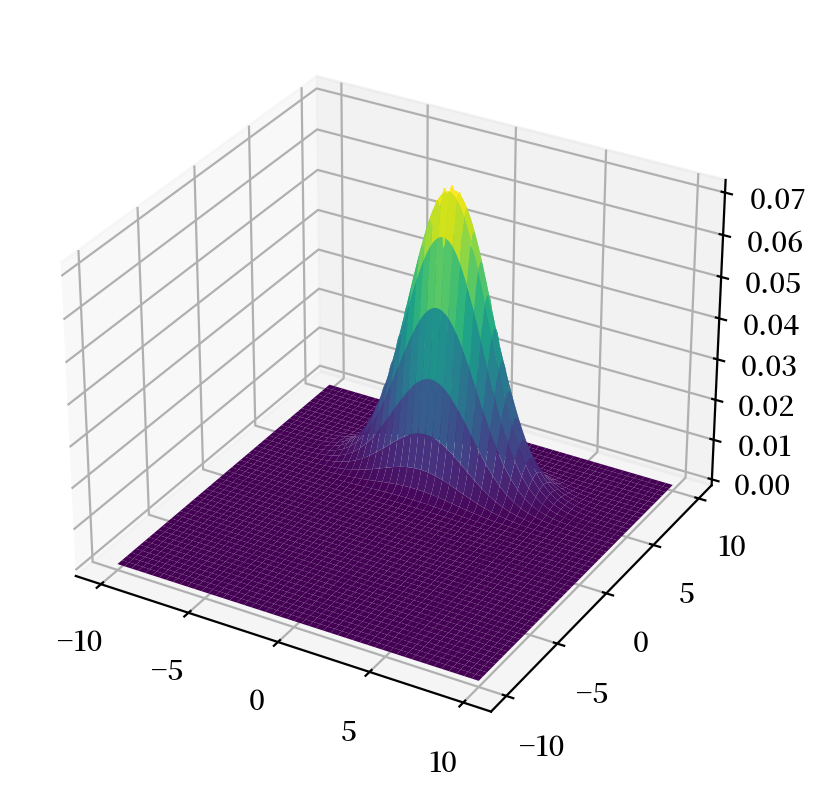

In [31]:
# %matplotlib notebook

fig = plt.figure()
ax = plt.axes(projection='3d')

surf = ax.plot_surface(x_mesh, y_mesh, func(x_mesh, y_mesh), cmap='viridis')
plt.show()

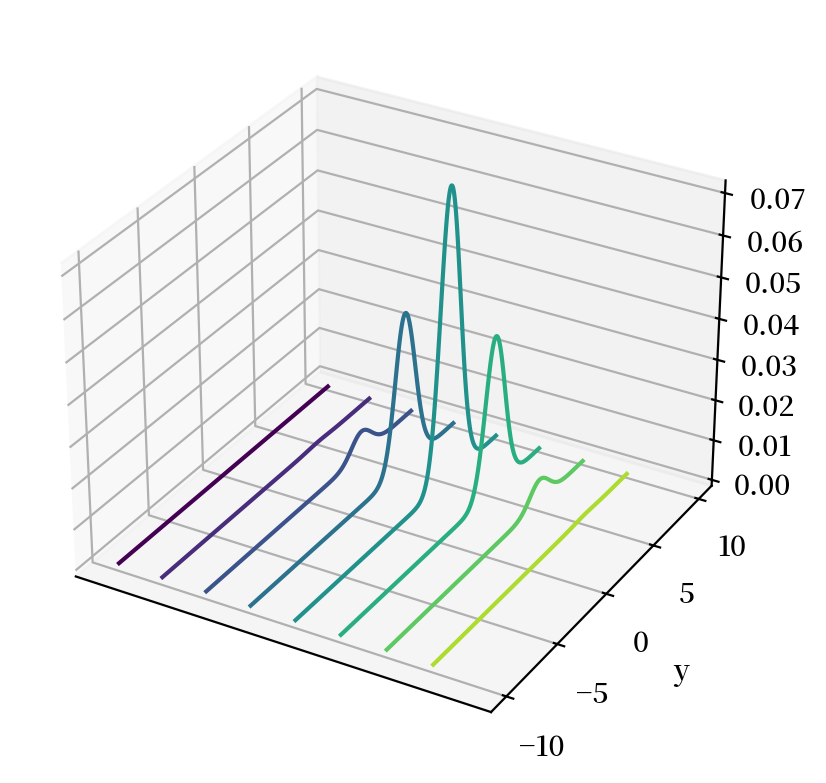

In [32]:
# %matplotlib notebook

fig = plt.figure()
ax = plt.axes(projection='3d')

curve = ax.contour(x_mesh, y_mesh, func(x_mesh, y_mesh), zdir='x')
plt.ylabel('y')
ax.set_zlabel('f')
ax.set_xticks([])
plt.show()

接下来我们可以使用内置的`numpy`函数进行模拟，并从样本均值和方差计算**样本**边际分布。

In [33]:
μ= np.array([0, 5])
σ= np.array([[5, .2], [.2, 1]])
n = 1_000_000
data = np.random.multivariate_normal(μ, σ, n)
x = data[:, 0]
y = data[:, 1]

**边缘分布**

-0.0016470116516810098 2.235988990856788


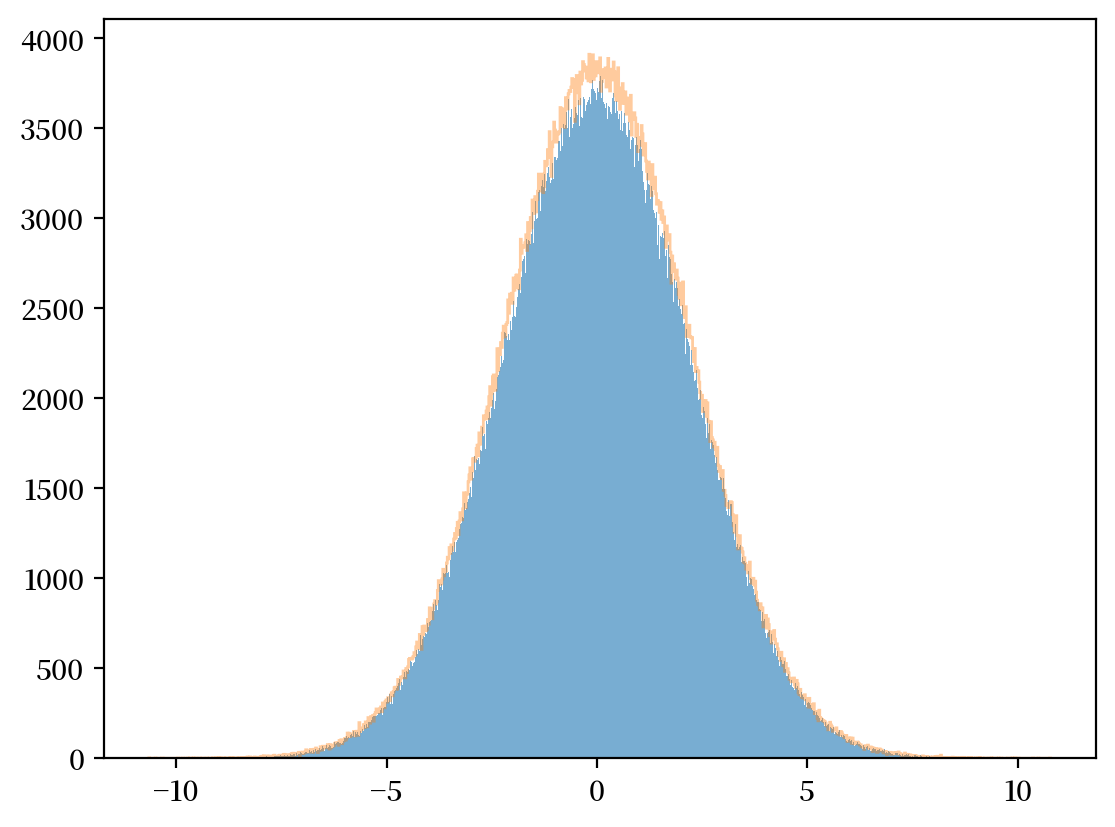

In [34]:
plt.hist(x, bins=1_000, alpha=0.6)
μx_hat, σx_hat = np.mean(x), np.std(x)
print(μx_hat, σx_hat)
x_sim = np.random.normal(μx_hat, σx_hat, 1_000_000)
plt.hist(x_sim, bins=1_000, alpha=0.4, histtype="step")
plt.show()

4.9999494493915035 1.0005920333280682


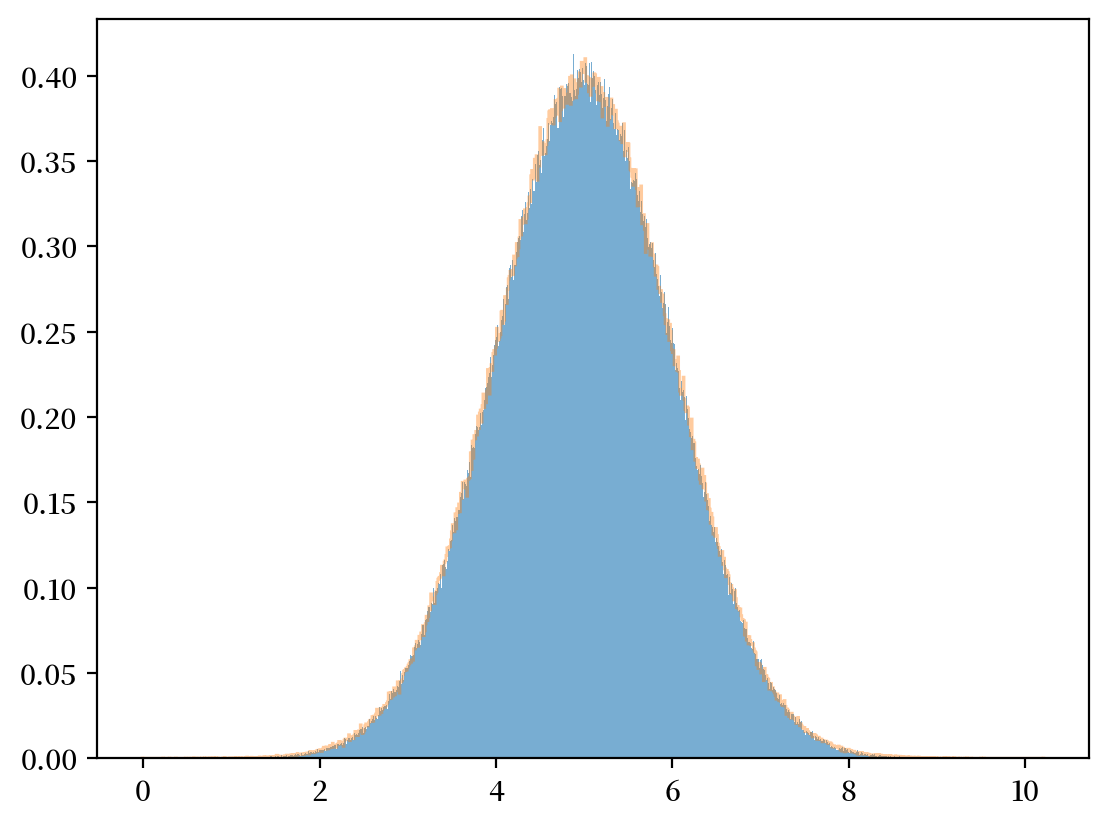

In [35]:
plt.hist(y, bins=1_000, density=True, alpha=0.6)
μy_hat, σy_hat = np.mean(y), np.std(y)
print(μy_hat, σy_hat)
y_sim = np.random.normal(μy_hat, σy_hat, 1_000_000)
plt.hist(y_sim, bins=1_000, density=True, alpha=0.4, histtype="step")
plt.show()

**条件分布**

总体条件分布为

$$
\begin{aligned} \\
[X|Y &= y ]\sim \mathbb{N}\bigg[\mu_X+\rho\sigma_X\frac{y-\mu_Y}{\sigma_Y},\sigma_X^2(1-\rho^2)\bigg] \\
[Y|X &= x ]\sim \mathbb{N}\bigg[\mu_Y+\rho\sigma_Y\frac{x-\mu_X}{\sigma_X},\sigma_Y^2(1-\rho^2)\bigg]
\end{aligned}
$$

让我们通过离散化并将近似联合密度映射到矩阵中来近似联合密度。

我们可以通过使用矩阵代数并注意到以下关系来计算离散化边际密度：

$$
\textrm{Prob}\{X=i|Y=j\}=\frac{f_{ij}}{\sum_{i}f_{ij}}
$$

固定 $y=0$。

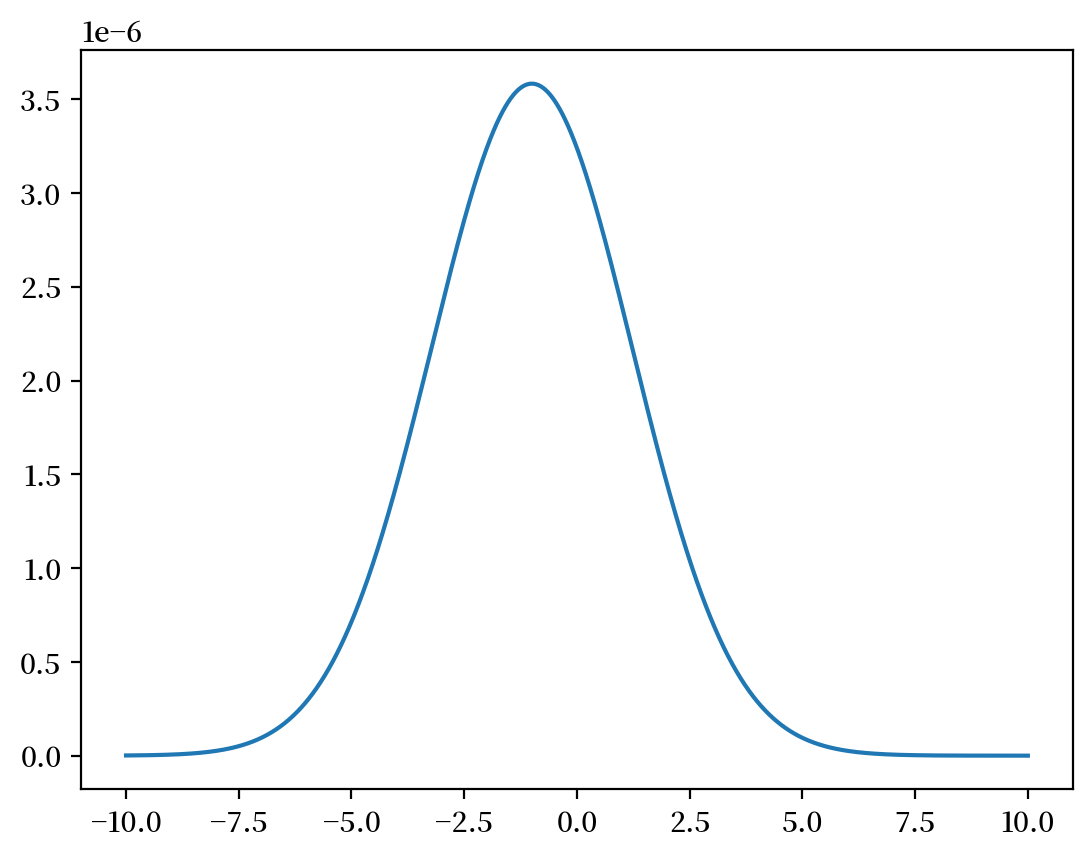

In [36]:
# 离散化边际密度
x = np.linspace(-10, 10, 1_000_000)
z = func(x, y=0) / np.sum(func(x, y=0))
plt.plot(x, z)
plt.show()

均值和方差的计算公式为

$$
\begin{aligned}
\mathbb{E}\left[X\vert Y=j\right] & =\sum_{i}iProb\{X=i\vert Y=j\}=\sum_{i}i\frac{f_{ij}}{\sum_{i}f_{ij}} \\
\mathbb{D}\left[X\vert Y=j\right] &=\sum_{i}\left(i-\mu_{X\vert Y=j}\right)^{2}\frac{f_{ij}}{\sum_{i}f_{ij}}
\end{aligned}
$$

让我们从具有上述均值和方差的正态分布中抽样，检验我们的近似值有多准确。

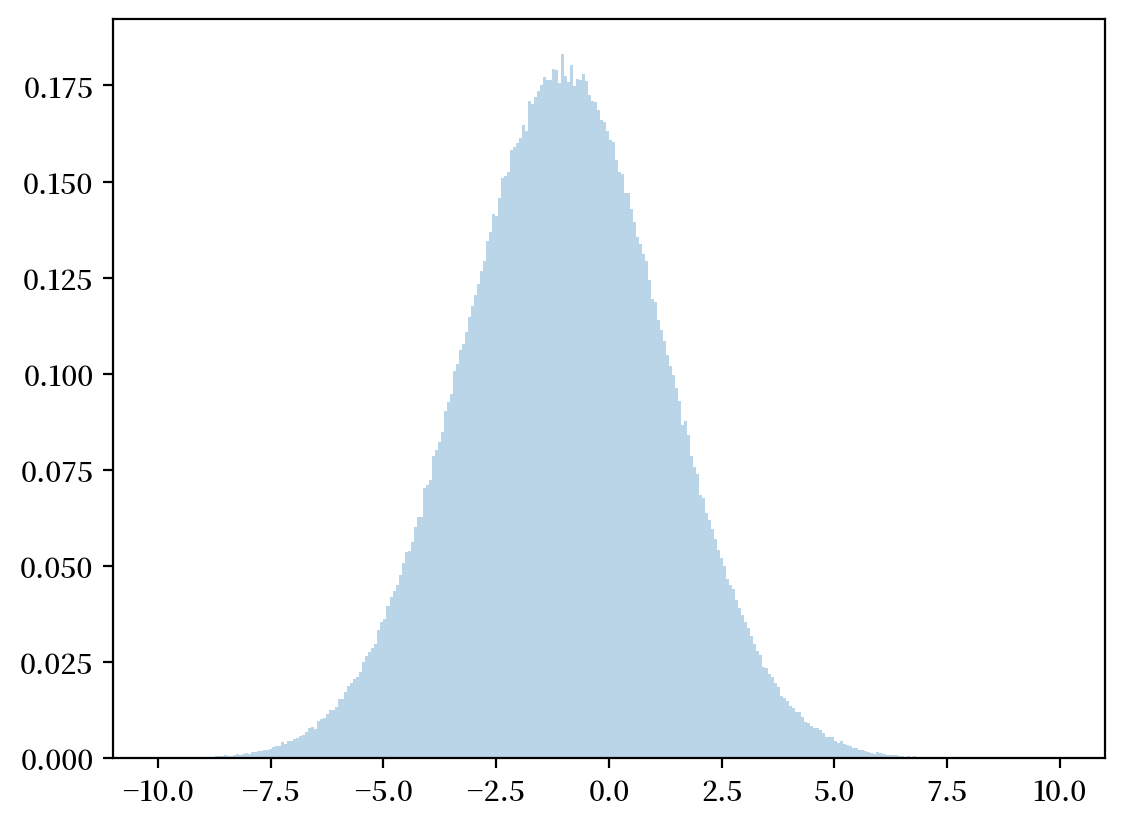

In [37]:
# 离散化均值
μx = np.dot(x, z)

# 离散化标准差
σx = np.sqrt(np.dot((x - μx)**2, z))

# 抽样
zz = np.random.normal(μx, σx, 1_000_000)
plt.hist(zz, bins=300, density=True, alpha=0.3, range=[-10, 10])
plt.show()

固定 $x=1$。

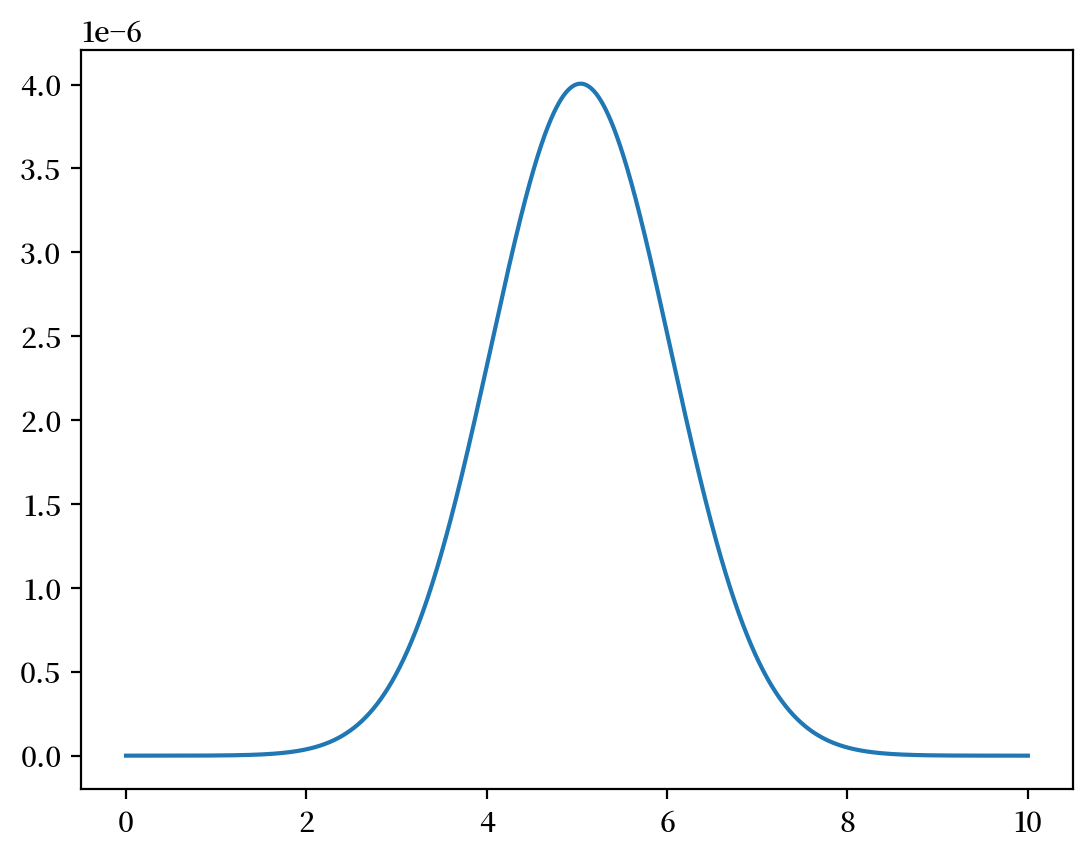

In [38]:
y = np.linspace(0, 10, 1_000_000)
z = func(x=1, y=y) / np.sum(func(x=1, y=y))
plt.plot(y,z)
plt.show()

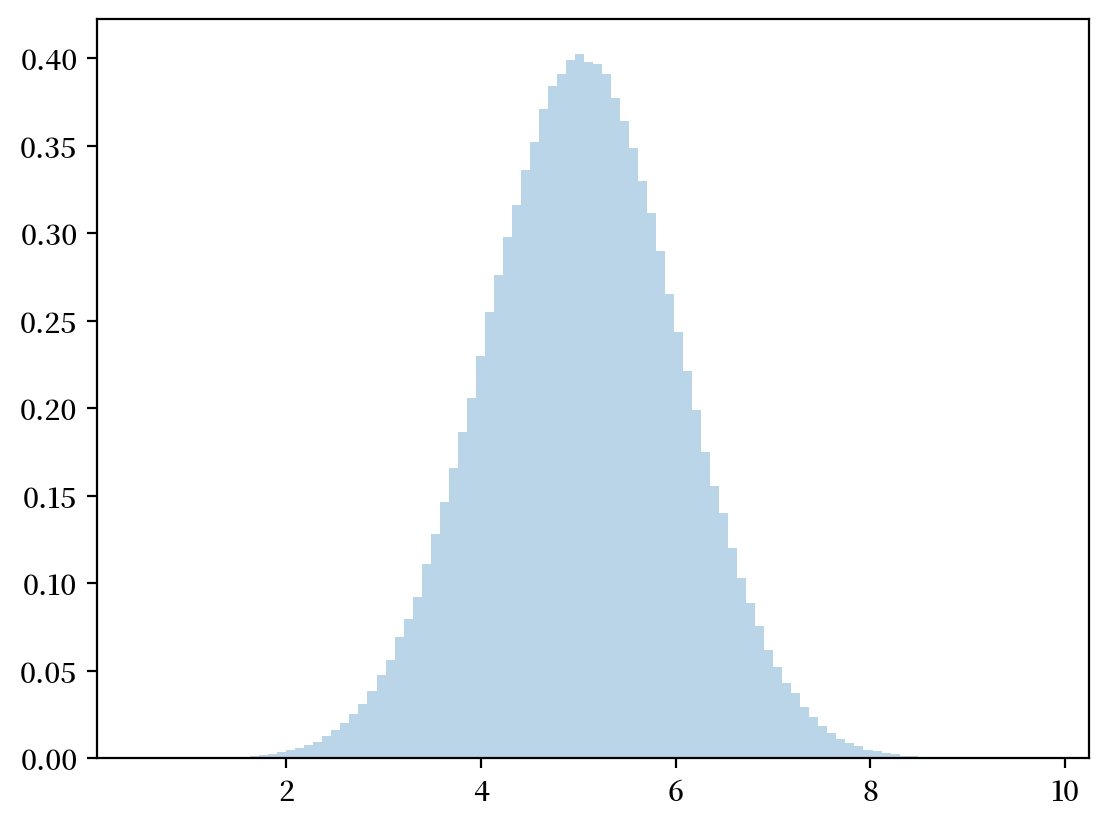

In [39]:
# 离散化的均值和标准差
μy = np.dot(y,z)
σy = np.sqrt(np.dot((y - μy)**2, z))

# 采样
zz = np.random.normal(μy,σy,1_000_000)
plt.hist(zz, bins=100, density=True, alpha=0.3)
plt.show()

我们将其与解析计算的参数进行比较，发现它们很接近。

In [40]:
print(μx, σx)
print(μ1 + ρ * σ1 * (0 - μ2) / σ2, np.sqrt(σ1**2 * (1 - ρ**2)))

print(μy, σy)
print(μ2 + ρ * σ2 * (1 - μ1) / σ1, np.sqrt(σ2**2 * (1 - ρ**2)))

-0.9997518414498469 2.226584133169768
-1.0 2.227105745132009
5.039999456960766 0.9959851265795594
5.04 0.9959919678390986


## 两个独立分布随机变量的和

设 $X, Y$ 是两个独立的离散随机变量，分别取值于 $\bar{X}, \bar{Y}$。

定义一个新的随机变量 $Z=X+Y$。

显然，$Z$ 取值于 $\bar{Z}$，定义如下：

$$
\begin{aligned}
\bar{X} & =\{0,1,\ldots,I-1\};\qquad f_i= \textrm{Prob} \{X=i\}\\
\bar{Y} & =\{0,1,\ldots,J-1\};\qquad g_j= \textrm{Prob}\{Y=j\}\\
\bar{Z}& =\{0,1,\ldots,I+J-2\};\qquad h_k=  \textrm{Prob} \{X+Y=k\}
\end{aligned}
$$

$X$ 和 $Y$ 的独立性意味着：

$$
\begin{aligned}
h_k & =\textrm{Prob}\{X=0,Y=k\}+\textrm{Prob}\{X=1,Y=k-1\}+\ldots+\textrm{Prob}\{X=k,Y=0\}\\
h_k& =f_0g_k+f_1g_{k-1}+\ldots+f_{k-1}g_1+f_kg_0 \qquad \text{for}\quad k=0,1,\ldots,I+J-2
\end{aligned}
$$

因此，我们有：

$$
h_k=\sum_{i=0}^{k} f_ig_{k-i} \equiv f*g
$$

其中 $f * g$ 表示序列 $f$ 和 $g$ 的**卷积**。

类似地，对于具有密度函数 $f_{X}, g_{Y}$ 的两个随机变量 $X,Y$，$Z=X+Y$ 的密度函数为

$$
f_{Z}(z)=\int_{-\infty}^{\infty} f_{X}(x) f_{Y}(z-x) dx \equiv f_{X}*g_{Y}
$$

其中 $ f_{X}*g_{Y} $ 表示函数 $f_X$ 和 $g_Y$ 的**卷积**。

## 转移概率矩阵

考虑以下两个随机变量的联合概率分布。

设 $X,Y$ 为离散随机变量，其联合分布为

$$
\textrm{Prob}\{X=i,Y=j\} = \rho_{ij}
$$

其中 $i = 0,\dots,I-1; j = 0,\dots,J-1$ 且

$$
\sum_i\sum_j \rho_{ij} = 1, \quad \rho_{ij} \geqslant 0.
$$

相关的条件分布为

$$
\textrm{Prob}\{Y=i\vert X=j\} = \frac{\rho_{ij}}{ \sum_{i}\rho_{ij}}
= \frac{\textrm{Prob}\{Y=j, X=i\}}{\textrm{Prob}\{ X=i\}}
$$

我们可以定义转移概率矩阵

$$
p_{ij}=\textrm{Prob}\{Y=j|X=i\}= \frac{\rho_{ij}}{ \sum_{j}\rho_{ij}}
$$

其中

$$
\left[
   \begin{matrix}
  p_{11} & p_{12}\\
  p_{21} & p_{22}
  \end{matrix}
\right]

$$

第一行是在 $X=0$ 条件下 $Y=j, j=0,1$ 的概率。

第二行是在 $X=1$ 条件下 $Y=j, j=0,1$ 的概率。

注意
- $\sum_{j}\rho_{ij}= \frac{ \sum_{j}\rho_{ij}}{ \sum_{j}\rho_{ij}}=1$，所以 $\rho$ 的每一行都是一个概率分布（每一列则不是）。

## 耦合

从联合分布开始

$$
\begin{aligned}
f_{ij} & =\textrm{Prob}\{X=i,Y=j\}\\
i& =0, \cdots，I-1\\
j& =0, \cdots，J-1\\
& \text{堆叠成一个 }I×J\text{ 矩阵}\\
& e.g. \quad I=1, J=1
\end{aligned}
$$

其中

$$
\left[
   \begin{matrix}
  f_{11} & f_{12}\\
  f_{21} & f_{22}
  \end{matrix}
\right]
$$

从联合分布出发，我们已经证明可以得到**唯一的**边际分布。

现在我们尝试反向推导。

我们会发现，从两个边际分布出发，通常可以构造出多个满足这些边际分布的联合分布。

这些联合分布中的每一个都被称为两个边际分布的**耦合**。

让我们从边际分布开始

$$
\begin{aligned}
\text{Prob} \{X=i\} &=  \sum_{j}f_{ij}=\mu_{i}, i=0, \cdots, I-1\\
\text{Prob} \{Y=j\}&=  \sum_{j}f_{ij}=\nu_{j}, j=0, \cdots, J-1
\end{aligned}
$$

给定两个边际分布，$X$的分布$\mu$和$Y$的分布$\nu$，联合分布$f_{ij}$被称为$\mu$和$\nu$的一个**耦合**。

**例子：**

考虑以下二元示例。

$$
\begin{aligned}
\text{Prob} \{X=0\}= & 1-q  =\mu_{0}\\
\text{Prob} \{X=1\}=& q  =\mu_{1}\\
\text{Prob} \{Y=0\}=& 1-r  =\nu_{0}\\
\text{Prob} \{Y=1\}= & r  =\nu_{1}\\
\text{where } 0 \leq q < r \leq 1
\end{aligned}
$$

我们构造两个耦合。

第一个耦合是我们两个边际分布的联合分布

$$f_{ij}=
\left[
   \begin{matrix}
 (1-q)(1-r)& (1-q)r\\
 q(1-r) & qr\\
  \end{matrix}
\right]
$$

为了验证这是一个耦合，我们检查

$$

\begin{aligned}
(1-q)(1-r)+(1-q)r+q(1-r)+qr &=1\\
\mu_{0}= (1-q)(1-r)+(1-q)r & =1-q\\
\mu_{1}= q(1-r)+qr & =q\\
\nu_{0}= (1-q)(1-r)+(1-r)q& =1-r\\
\mu_{1}= r(1-q)+qr& =r
\end{aligned}
$$

我们两个边缘分布的第二个耦合是联合分布

$$
f_{ij}=
\left[
   \begin{matrix}
(1-r)&r-q\\
0 & q\\
  \end{matrix}
\right]
$$

要验证这是一个耦合，注意到

$$
\begin{aligned}
1-r+r-q+q &=1\\
\mu_{0}& = 1-q\\
\mu_{1}& = q\\
\nu_{0}& = 1-r\\
\nu_{1}& = r
\end{aligned}
$$

因此，我们提出的两个联合分布具有相同的边缘分布。

但是联合分布不同。

因此，多个联合分布 $[f_{ij}]$ 可以具有相同的边缘分布。

**注释：**
- 耦合在最优传输问题和马尔可夫过程中很重要。

## Copula函数

假设 $X_1, X_2, \dots, X_n$ 是 $N$ 个随机变量，并且

* 它们的边缘分布是 $F_1(x_1), F_2(x_2),\dots, F_N(x_N)$，并且

* 它们的联合分布是$H(x_1,x_2,\dots,x_N)$

那么存在一个**Copula函数**$C(\cdot)$满足

$$
H(x_1,x_2,\dots,x_N) = C(F_1(x_1), F_2(x_2),\dots,F_N(x_N)).
$$

我们可以得到

$$
C(u_1,u_2,\dots,u_n) = H[F^{-1}_1(u_1),F^{-1}_2(u_2),\dots,F^{-1}_N(u_N)]
$$

从逻辑的反方向来看，给定单变量**边缘分布**$F_1(x_1), F_2(x_2),\dots,F_N(x_N)$和一个Copula函数$C(\cdot)$，函数$H(x_1,x_2,\dots,x_N) = C(F_1(x_1), F_2(x_2),\dots,F_N(x_N))$是$F_1(x_1), F_2(x_2),\dots,F_N(x_N)$的一个**耦合**。

因此，对于给定的边缘分布，当相关的单变量随机变量不独立时，我们可以使用Copula函数来确定联合分布。

Copula函数经常用于表征随机变量之间的**相依性**。

**离散边缘分布**

如上所述，对于两个给定的边缘分布，可能存在多个耦合。

例如，考虑两个随机变量 $X, Y$ 的分布为

$$
\begin{aligned}
\text{Prob}(X = 0)& = 0.6,\\
\text{Prob}(X = 1) &= 0.4,\\
\text{Prob}(Y = 0)& = 0.3,\\
\text{Prob}(Y = 1) &= 0.7,
\end{aligned}
$$

对于这两个随机变量，可能存在多个耦合。

让我们首先生成 X 和 Y。

In [41]:
# 定义参数
mu = np.array([0.6, 0.4])
nu = np.array([0.3, 0.7])

# 抽样次数
draws = 1_000_000

# 从均匀分布生成抽样
p = np.random.rand(draws)

# 通过均匀分布生成 X 和 Y 的抽样
x = np.ones(draws)
y = np.ones(draws)
x[p <= mu[0]] = 0
x[p > mu[0]] = 1
y[p <= nu[0]] = 0
y[p > nu[0]] = 1

In [42]:
# 从抽样中计算参数
q_hat = sum(x[x == 1])/draws
r_hat = sum(y[y == 1])/draws

# 打印输出
print("x的分布")
xmtb = pt.PrettyTable()
xmtb.field_names = ['x值', 'x概率']
xmtb.add_row([0, 1-q_hat])
xmtb.add_row([1, q_hat])
print(xmtb)

print("y的分布") 
ymtb = pt.PrettyTable()
ymtb.field_names = ['y值', 'y概率']
ymtb.add_row([0, 1-r_hat])
ymtb.add_row([1, r_hat])
print(ymtb)

x的分布
+-----+----------+
| x值 |  x概率   |
+-----+----------+
|  0  | 0.599882 |
|  1  | 0.400118 |
+-----+----------+
y的分布
+-----+----------+
| y值 |  y概率   |
+-----+----------+
|  0  | 0.299678 |
|  1  | 0.700322 |
+-----+----------+


现在让我们用两个边际分布，一个是$X$的，另一个是$Y$的，来构造两个不同的耦合。

对于第一个联合分布：

$$
\textrm{Prob}(X=i,Y=j) = f_{ij}
$$

其中

$$
[f_{ij}] = \left[\begin{array}{cc}
0.18 & 0.42\\
0.12 & 0.28
\end{array}\right]
$$

让我们使用Python来构造这个联合分布，然后验证其边际分布是否符合我们的要求。

In [43]:
# 定义参数
f1 = np.array([[0.18, 0.42], [0.12, 0.28]])
f1_cum = np.cumsum(f1)

# 抽样次数
draws1 = 1_000_000

# 从均匀分布生成抽样
p = np.random.rand(draws1)

# 通过均匀分布生成第一个耦合的抽样
c1 = np.vstack([np.ones(draws1), np.ones(draws1)])
# X=0, Y=0
c1[0, p <= f1_cum[0]] = 0
c1[1, p <= f1_cum[0]] = 0
# X=0, Y=1
c1[0, (p > f1_cum[0])*(p <= f1_cum[1])] = 0
c1[1, (p > f1_cum[0])*(p <= f1_cum[1])] = 1
# X=1, Y=0
c1[0, (p > f1_cum[1])*(p <= f1_cum[2])] = 1
c1[1, (p > f1_cum[1])*(p <= f1_cum[2])] = 0
# X=1, Y=1
c1[0, (p > f1_cum[2])*(p <= f1_cum[3])] = 1
c1[1, (p > f1_cum[2])*(p <= f1_cum[3])] = 1

In [44]:
# 从抽样中计算参数
f1_00 = sum((c1[0, :] == 0)*(c1[1, :] == 0))/draws1
f1_01 = sum((c1[0, :] == 0)*(c1[1, :] == 1))/draws1
f1_10 = sum((c1[0, :] == 1)*(c1[1, :] == 0))/draws1
f1_11 = sum((c1[0, :] == 1)*(c1[1, :] == 1))/draws1

# 打印第一个联合分布
print("c1的第一个联合分布")
c1_mtb = pt.PrettyTable()
c1_mtb.field_names = ['c1_x值', 'c1_y值', 'c1概率']
c1_mtb.add_row([0, 0, f1_00])
c1_mtb.add_row([0, 1, f1_01])
c1_mtb.add_row([1, 0, f1_10])
c1_mtb.add_row([1, 1, f1_11])
print(c1_mtb)

c1的第一个联合分布
+--------+--------+----------+
| c1_x值 | c1_y值 |  c1概率  |
+--------+--------+----------+
|   0    |   0    | 0.180216 |
|   0    |   1    | 0.419301 |
|   1    |   0    | 0.119948 |
|   1    |   1    | 0.280535 |
+--------+--------+----------+


In [45]:
# 从抽样中计算参数
c1_q_hat = sum(c1[0, :] == 1)/draws1
c1_r_hat = sum(c1[1, :] == 1)/draws1

# 打印输出
print("x的边际分布")
c1_x_mtb = pt.PrettyTable()
c1_x_mtb.field_names = ['c1_x_值', 'c1_x_概率']
c1_x_mtb.add_row([0, 1-c1_q_hat])
c1_x_mtb.add_row([1, c1_q_hat])
print(c1_x_mtb)

print("y的边际分布")
c1_ymtb = pt.PrettyTable()
c1_ymtb.field_names = ['c1_y_值', 'c1_y_概率']
c1_ymtb.add_row([0, 1-c1_r_hat])
c1_ymtb.add_row([1, c1_r_hat])
print(c1_ymtb)

x的边际分布
+---------+--------------------+
| c1_x_值 |     c1_x_概率      |
+---------+--------------------+
|    0    | 0.5995170000000001 |
|    1    |      0.400483      |
+---------+--------------------+
y的边际分布
+---------+-----------+
| c1_y_值 | c1_y_概率 |
+---------+-----------+
|    0    |  0.300164 |
|    1    |  0.699836 |
+---------+-----------+


现在，让我们构造另一个也是 $X$ 和 $Y$ 的耦合的联合分布

$$
[f_{ij}] = \left[\begin{array}{cc}
0.3 & 0.3\\
0 & 0.4
\end{array}\right]
$$

In [46]:
# 定义参数
f2 = np.array([[0.3, 0.3], [0, 0.4]])
f2_cum = np.cumsum(f2)

# 抽样次数
draws2 = 1_000_000

# 从均匀分布生成抽样
p = np.random.rand(draws2)

# 通过均匀分布生成第一个耦合的抽样
c2 = np.vstack([np.ones(draws2), np.ones(draws2)])
# X=0, Y=0
c2[0, p <= f2_cum[0]] = 0
c2[1, p <= f2_cum[0]] = 0
# X=0, Y=1
c2[0, (p > f2_cum[0])*(p <= f2_cum[1])] = 0
c2[1, (p > f2_cum[0])*(p <= f2_cum[1])] = 1
# X=1, Y=0
c2[0, (p > f2_cum[1])*(p <= f2_cum[2])] = 1
c2[1, (p > f2_cum[1])*(p <= f2_cum[2])] = 0
# X=1, Y=1
c2[0, (p > f2_cum[2])*(p <= f2_cum[3])] = 1
c2[1, (p > f2_cum[2])*(p <= f2_cum[3])] = 1

In [47]:
# 从抽样中计算参数
f2_00 = sum((c2[0, :] == 0)*(c2[1, :] == 0))/draws2
f2_01 = sum((c2[0, :] == 0)*(c2[1, :] == 1))/draws2
f2_10 = sum((c2[0, :] == 1)*(c2[1, :] == 0))/draws2
f2_11 = sum((c2[0, :] == 1)*(c2[1, :] == 1))/draws2

# 打印第二个联合分布的输出
print("c2的第一个联合分布")
c2_mtb = pt.PrettyTable()
c2_mtb.field_names = ['c2_x值', 'c2_y值', 'c2_概率']
c2_mtb.add_row([0, 0, f2_00])
c2_mtb.add_row([0, 1, f2_01])
c2_mtb.add_row([1, 0, f2_10])
c2_mtb.add_row([1, 1, f2_11])
print(c2_mtb)

c2的第一个联合分布
+--------+--------+----------+
| c2_x值 | c2_y值 | c2_概率  |
+--------+--------+----------+
|   0    |   0    | 0.299959 |
|   0    |   1    | 0.299673 |
|   1    |   0    |   0.0    |
|   1    |   1    | 0.400368 |
+--------+--------+----------+


In [48]:
# 从抽样中计算参数
c2_q_hat = sum(c2[0, :] == 1)/draws2
c2_r_hat = sum(c2[1, :] == 1)/draws2

# 打印输出
print("x的边际分布")
c2_x_mtb = pt.PrettyTable()
c2_x_mtb.field_names = ['c2_x_取值', 'c2_x_概率']
c2_x_mtb.add_row([0, 1-c2_q_hat])
c2_x_mtb.add_row([1, c2_q_hat])
print(c2_x_mtb)

print("y的边际分布")
c2_ymtb = pt.PrettyTable()
c2_ymtb.field_names = ['c2_y_取值', 'c2_y_概率']
c2_ymtb.add_row([0, 1-c2_r_hat])
c2_ymtb.add_row([1, c2_r_hat])
print(c2_ymtb)

x的边际分布
+-----------+--------------------+
| c2_x_取值 |     c2_x_概率      |
+-----------+--------------------+
|     0     | 0.5996319999999999 |
|     1     |      0.400368      |
+-----------+--------------------+
y的边际分布
+-----------+-----------+
| c2_y_取值 | c2_y_概率 |
+-----------+-----------+
|     0     |  0.299959 |
|     1     |  0.700041 |
+-----------+-----------+


我们已经验证了联合分布 $c_1$ 和 $c_2$ 具有相同的 $X$ 和 $Y$ 的边际分布。

因此它们都是 $X$ 和 $Y$ 的耦合。

## 时间序列

假设有两个时间段。

- $t=0$ "今天"
- $t=1$ "明天"

令 $X(0)$ 为在 $t=0$ 时刻实现的随机变量，$X(1)$ 为在 $t=1$ 时刻实现的随机变量。

假设

$$
\begin{aligned}
\text{Prob} \{X(0)=i,X(1)=j\} &=f_{ij}≥0，i=0,\cdots,I-1\\
\sum_{i}\sum_{j}f_{ij}&=1
\end{aligned}
$$

$f_{ij}$ 是 $[X(0), X(1)]$ 的联合分布。

条件分布为

$$\text{Prob} \{X(1)=j|X(0)=i\}= \frac{f_{ij}}{ \sum_{j}f_{ij}}$$

**注意：**
- 这是时间序列最优预测理论的一个关键公式。